# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Предобработка данных**

[Количество фотографий квартиры total_image](#total_image)

[Цена на момент снятия публикации last_price](#last_price)

[Общая площадь квартиры total_area](#total_area)

[Столбец first_day_exposition](#first_day_exposition)

[Количество комнат Столбец rooms](#rooms)

[Высота потолков ceiling_height](#ceiling_height)

[Количество этажей в доме floors_total](#floors_total)

[Жилая площадь living_area](#living_area)

[Этаж floor](#floor)

[Апартаменты is_apartment](#is_apartment)

[Студия studio](#studio)

[Открытая планировка open_plan](#open_plan)

[Площадь кухни kitchen_area](#kitchen_area)

[Балкон balcony](#balcony)

[Населённый пункт locality_name](#locality_name)

[Расстояние до ближайшего аэропорта airports_nearest](#airports_nearest)

[Расстояние до центра city_centers_nearest](#city_centers_nearest)

[Количество парков в радиусе трех километров parks_around](#parks_around) 

[Расстояние до ближайшего парка parks_nearest](#parks_nearest) 

[Водоёмы в радиусе трех километров ponds_around](#ponds_around) 

[Расстояние до ближайшего водоёма ponds_nearest](#ponds_nearest) 

[Сколько дней было размещено объявление days_exposition](#days_exposition) 

[Итоговая таблица после предобработки](#itog)

**Добавление новых столбцов**

[Стоимость квадратного метра cost_meter](#cost_meter)

[День публикации publication_day](#publication_day)

[Месяц публикации publication_month](#publication_month) 

[Год публикации publication_year](#publication_year)

[Тип этажа floor_type](#floor_type)

**Исследовательский анализ**

[Общая площадь](#total_area1)

[Жилая площадь](#living_area1)

[Площадь кухни](#kitchen_area1)

[Цена объекта](#last_price1)

[Количество комнат](#rooms1)

[Высота потолков](#ceiling_height1)

[Этаж квартиры](#floor1)

[Тип этажа](#floor_type1)

[Общее количество этажей в доме](#floors_total1)

[Рассояние до центра города](#city_centers_nearest_mtr1)

[Расстояние до ближайшего аэропорта](#airports_nearest1)

[Расстояние до ближайшего парка](#parks_nearest1)

[Дата и месяц публикации объявления](#publication_day1)

[Скорость продажи квартир](#days_expositions1)

[Влияние характеристик квартиры на стоимость](#speed_sale)

[Средняя стоимость квадратного метра для десяти населённх пунктов с максимальным числом объявлений](#middleprice)

[Средняя стоимость каждого километра в Санкт-Петербурге](#spbprice)

### Откройте файл с данными и изучите общую информацию.  

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️В будущем для подгрузки данных рекомендую использовать конструкцию try-except или os.path, так удобнее работать с файлом локально</div>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

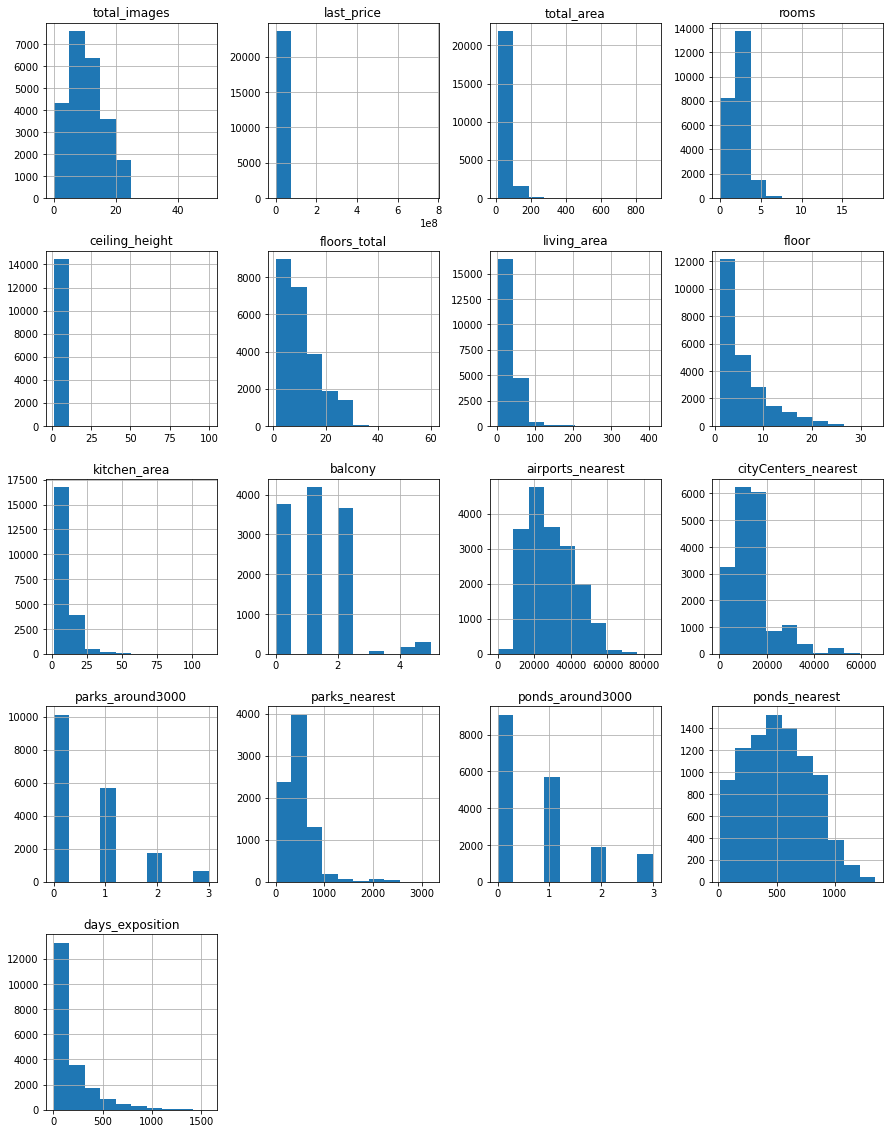

In [ ]:
data.hist(figsize=(15, 20))

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- Исходя из первичного ознакомления с данными, видно, что некоторые столбцы имеют вещественный тип, приведём их к целочисленному. Например, количество балконов у нас обозначено следующим образом "2.0", у нас не может быть "2.4" или "1.5" балконов, по этому, вещественный тип данных в данном случае ни к чему. Обработаем такие стобцы в блоке предобработки. 
- Также, стобцы "cityCenters_nearest", "parks_around3000" и "ponds_around3000" стоит привести к общему виду. 
- Некоторые данные явно указаны неверно, так максимальное значение в столбце с высотой потолков, равно 100, здесь явно допущена ошибка. Подробно разберём и обработаем такие значения далее. 


### Предобработка данных

**Столбец "total_images". Количество фотографий квартиры.** <a id='total_images'></a> 

In [ ]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<AxesSubplot:>

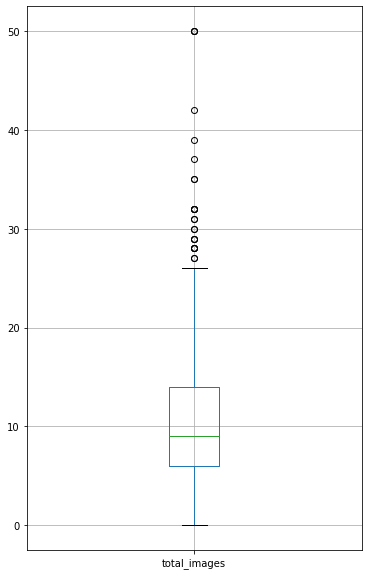

In [ ]:
data.boxplot(column=['total_images'], figsize=(6, 10))

<AxesSubplot:>

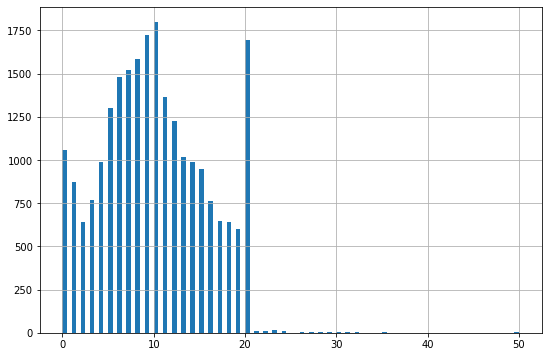

In [ ]:
data['total_images'].hist(figsize=(9,6), bins=100)

In [ ]:
data['total_images'].isna().sum()

0

- Здесь всё в порядке, хоть у нас и есть значения "0", но возможно фотографии квартиры действительно отсутствуют. С типом данных порядок.   


**Столбец "last_price". Цена на момент снятия с публикации.** <a id='last_price'></a> 

In [ ]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

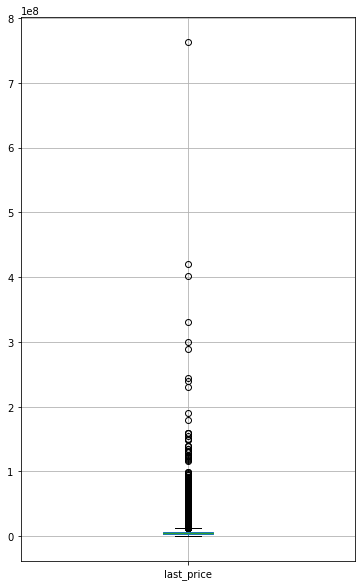

In [ ]:
data.boxplot(column=['last_price'], figsize=(6, 10))

<AxesSubplot:>

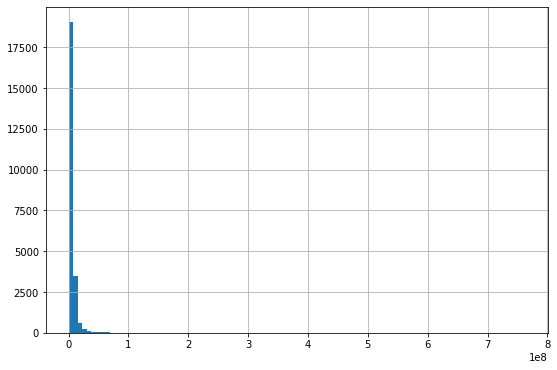

In [ ]:
data['last_price'].hist(figsize=(9,6), bins=100)

- В столбце "last_price" числа с точкой приведём к целочисленным. И проверим пропущенные значения.

In [ ]:
data['last_price'] = data['last_price'].astype('Int64')

In [ ]:
data['last_price'].isna().sum()

0

In [ ]:
data.query('last_price == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- Пропуски отсутствуют, уже не плохо.

- Есть как очень маленькое значение 12190 так и очень большое 763000000. В данных явно содержатся выбросы, избавимся от них, чтобы значения были более равномерные. Цена 12190 скорее всего была указана ошибочно, а может сюда попали данные не о продаже, а об аренде. 

In [ ]:
data = data.loc[(data['last_price'] > 400000) & (data['last_price'] < 100000000)].reset_index(drop=True)

In [ ]:
data['last_price'].describe()


count    2.366100e+04
mean     6.251771e+06
std      6.424397e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.635000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

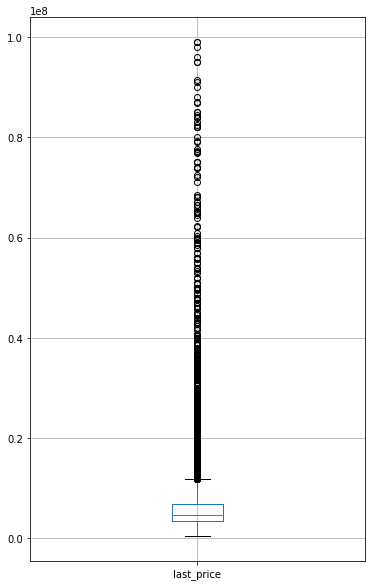

In [ ]:
data.boxplot(column=['last_price'], figsize=(6, 10))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

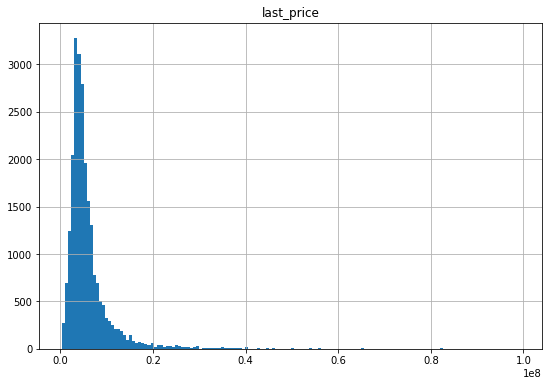

In [ ]:
data.hist('last_price', bins = 150, figsize=(9, 6))

- Теперь лучше. После удаления, потеряли 38 строк, не так много, а на результатах исследования, скажется это скорее положительно. 

**Столбец "total_area". Общая площадь квартиры в квадратных метрах (м²)** <a id='total_area'></a> 

In [ ]:
data['total_area'].describe()

count    23661.000000
mean        59.925974
std         33.470704
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

<AxesSubplot:>

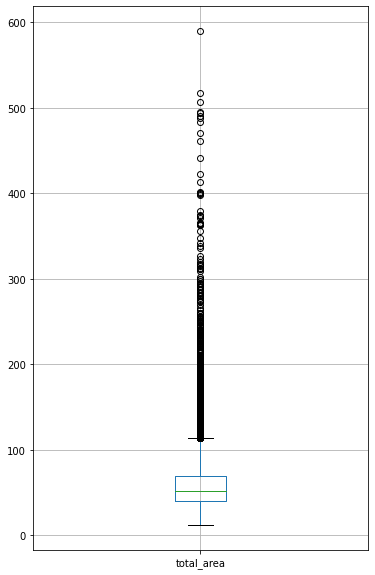

In [ ]:
data.boxplot(column=['total_area'], figsize=(6, 10))

<AxesSubplot:>

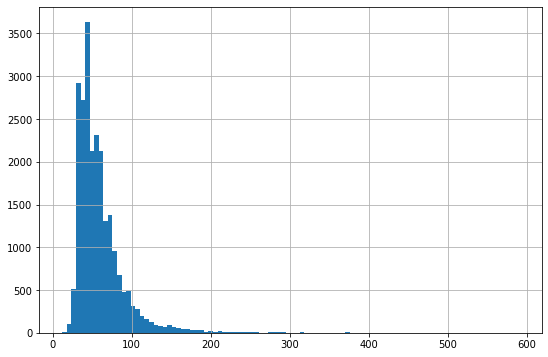

In [ ]:
data['total_area'].hist(figsize=(9,6), bins=100)

In [ ]:
data['total_area'].isna().sum()

0

- Кажется здесь всё порядке, оставим всё как есть.

**Столбец "first_day_exposition". Дата публикации объявления.** <a id='first_day_exposition'></a> 

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- У нас есть дата публикации, но время публикации отсутствует, удалим время, так как информация вида "00:00:00" нам ничего не даёт, заполнить эти данные не удастся. Также, столбец "first_day_exposition" имеет тип данных "object" переведём его в "datetime64".

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

- Теперь данные выглядят лучше и не содержат ненужной нам информации. 

**Столбец "rooms". Количество комнат.** <a id='rooms'></a> 


In [ ]:
data['rooms'].isna().sum()

0

- Казалось бы, пропусков нет, но лучше посмотрим на графиках.

<AxesSubplot:>

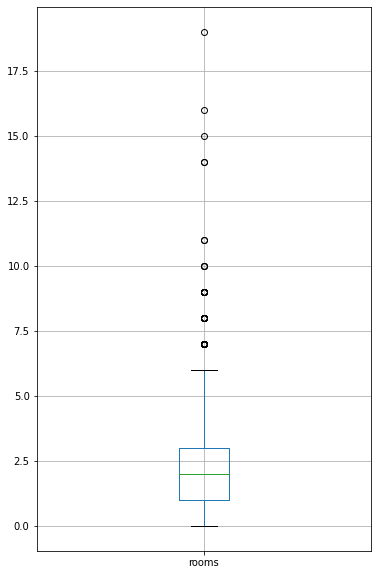

In [ ]:
data.boxplot(column=['rooms'], figsize=(6, 10))

<AxesSubplot:>

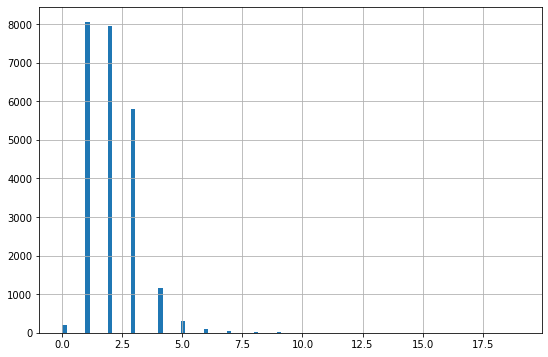

In [ ]:
data['rooms'].hist(figsize=(9,6), bins=100)

In [ ]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23172,7,3200000,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23404,0,2500000,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23516,15,3350000,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23554,10,1450000,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


- 197 строк с пропущенными значениями. Посмотрим через сводную таблицу, какие значения соответствуют квартирам с различным кол-ом комнат. 

In [ ]:
data.pivot_table(index='rooms', values='total_area', aggfunc=['mean', 'median', 'count', 'min', 'max'])

,mean,median,count,min,max
,total_area,total_area,total_area,total_area,total_area
rooms,,,,,
0,29.279746,26.05,197,15.5,371.0
1,37.644669,36.56,8047,12.0,494.1
2,55.831810,53.00,7938,20.0,196.0
3,77.685761,72.90,5810,40.1,363.1
4,106.417848,98.90,1171,42.0,470.3
5,157.224652,145.00,316,40.0,507.0
6,194.441500,181.75,100,87.0,460.8
7,239.685185,210.70,54,100.6,517.0


- Очень большой разброс значений в нужной нам категории. От 15.5 до 371. Проверим все значения выше среднего. 

In [ ]:
data.query('rooms==0 and total_area > 29')['total_area'].sort_values()

10400     29.10
7245      29.20
4962      29.30
22829     30.00
1595      30.00
7275      30.00
22017     30.10
5947      30.30
19705     30.50
15732     31.00
6794      31.00
13849     31.00
17926     31.00
18000     31.00
3138      31.00
1523      31.00
17778     31.10
1172      32.00
6209      32.00
15690     32.03
15680     32.20
6997      32.30
12213     32.40
18104     32.50
16495     32.80
21594     34.00
508       34.40
4674      35.00
838       35.00
9036      38.30
16106     42.10
7226      42.63
15296     43.30
9992      44.20
13594     58.40
21193     71.00
3449      73.60
20051     98.40
19363    371.00
Name: total_area, dtype: float64

- Большинство квартир с пропущенным значением в кол-ве комнат, явно можно отнести к однокомнатным, но есть и исключения. Посмотрим средние значения для квартир с 1-4 комнатами.

In [ ]:
for count in range(1,5):
    print(f'Комнат в квартире: {count}, среднее:', data.query('rooms == @count')['total_area'].mean())

Комнат в квартире: 1, среднее: 37.64466882067852
Комнат в квартире: 2, среднее: 55.83181027966743
Комнат в квартире: 3, среднее: 77.68576075731498
Комнат в квартире: 4, среднее: 106.41784799316824


- Разобьём всё на категории:
- 1 комната - до 37  квадратных метра;
- 2 комнаты - от 37 до 55  квадратных метра;
- 3 комнаты - от 55 до 77  квадратных метра;
- 4 комнаты - от 77 до 106 квадратных метра.

In [ ]:
data.loc[(data['rooms']==0) & (data['total_area']<37), 'rooms'] = 1
data.loc[(data['rooms']==0) & (data['total_area']>37) & (data['total_area']<55), 'rooms'] = 2
data.loc[(data['rooms']==0) & (data['total_area']>55) & (data['total_area']<77), 'rooms'] = 3
data.loc[(data['rooms']==0) & (data['total_area']>77) & (data['total_area']<106), 'rooms'] = 4


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отлично!</div>


 - У нас осталась квартира с площадью 371 метр, посмотрим, что с ней можно сделать.

In [ ]:
data.pivot_table(index='rooms', values='total_area', aggfunc=['mean', 'median', 'max'])

,mean,median,max
,total_area,total_area,total_area
rooms,,,
0,371.000000,371.00,371.0
1,37.383025,36.30,494.1
2,55.823170,53.00,196.0
3,77.680590,72.90,363.1
4,106.411007,98.90,470.3
5,157.224652,145.00,507.0
6,194.441500,181.75,460.8
7,239.685185,210.70,517.0


- А вот здесь уже не всё так просто, видимо всё же придётся удалить строку. Квартира таких размеров подходит сразу под несколько категорий с различным количеством комнат.

In [ ]:
data = data.drop(index=19363)

In [ ]:
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23656,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23657,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23658,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


- Пропуски устранили, можно двигаться дальше.

**Столбец "ceiling_height". Высота потолков.** <a id='ceiling_height'></a> 

In [ ]:
data['ceiling_height'].describe()

count    14477.000000
mean         2.769807
std          1.261218
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

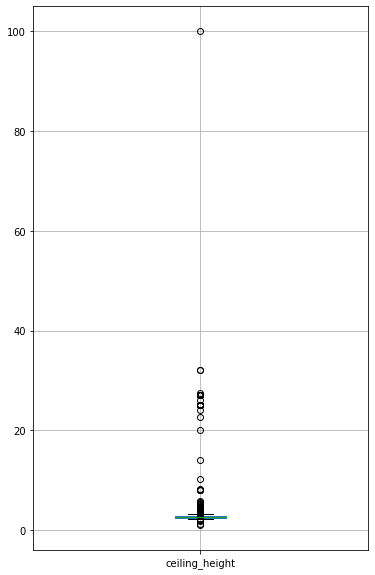

In [ ]:
data.boxplot(column=['ceiling_height'], figsize=(6, 10))

<AxesSubplot:>

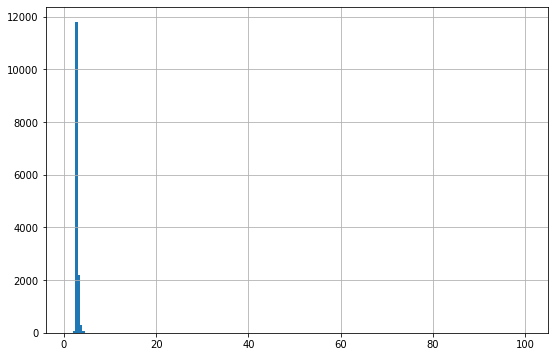

In [ ]:
data['ceiling_height'].hist(figsize=(9,6), bins=200)

- Явно присутствуют выбросы, а вот среднее значение выглядит вполне реальным.

In [ ]:
data['ceiling_height'].isna().sum()

9183

- Кроме того, есть ещё и пропущенные значения.

In [ ]:
data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3139,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4634,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4867,7,3000000,25.0,2017-09-27,1,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5066,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5236,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5659,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5797,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6235,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9363,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


- Будем считать "нормальными" значения до 6 метров(это могут быть двухуровневые квартиры). Слишком низкие значения, заменим на медианные. Также есть ряд значений, где вероятно просто пропущена запятая. 
- На самом деле, можно было бы и оставить квартиры с высотой потолков до 10 метров, это вероятно, но не будем рисковать и оставим более реальные значения. 

In [ ]:
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = data['ceiling_height'] / 10

In [ ]:
data.loc[data['ceiling_height'] < 2.7, 'ceiling_height'] = data['ceiling_height'].median()

In [ ]:
data.loc[data['ceiling_height'] == 10, 'ceiling_height'] = data['ceiling_height'].median()

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Согласна!</div>


In [ ]:
data['ceiling_height'].describe()

count    23660.000000
mean         2.729116
std          0.196267
min          2.650000
25%          2.650000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

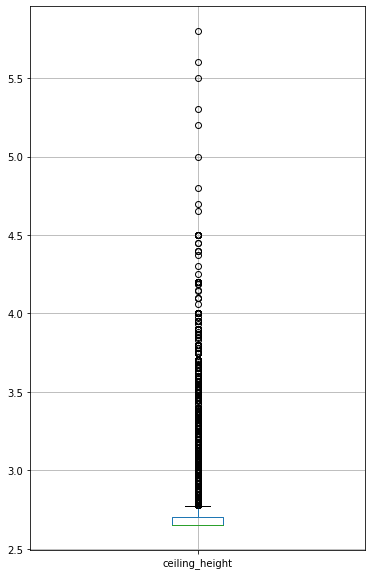

In [ ]:
data.boxplot(column=['ceiling_height'], figsize=(6, 10))

<AxesSubplot:>

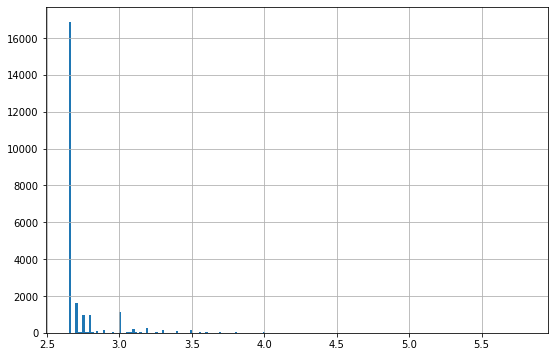

In [ ]:
data['ceiling_height'].hist(figsize=(9,6), bins=200)

- Значения с пропущенной запятой привели к нормальному виду, строки с пропущенными значениями и крайне низкими, заполнили медианным. Теперь данные выглядят более реальными.

**Столбец "floors_total". Количество этажей в доме.** <a id='floors_total'></a> 

In [ ]:
data['floors_total'].describe()

count    23574.00000
mean        10.67935
std          6.59877
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

<AxesSubplot:>

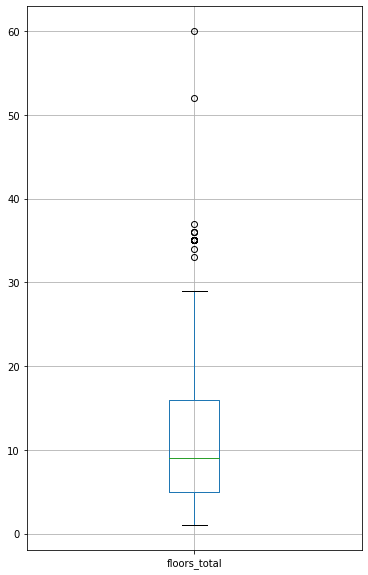

In [ ]:
data.boxplot(column=['floors_total'], figsize=(6, 10))

<AxesSubplot:>

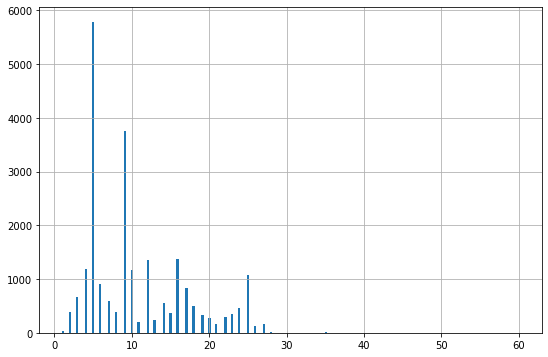

In [ ]:
data['floors_total'].hist(figsize=(9,6), bins=200)

In [ ]:
data['floors_total'] = data['floors_total'].astype('Int64')

- Сразу же поменяли тип данных, т.к. в количестве этажей у нас не может быть десятичных знаков. 

In [ ]:
data['floors_total'].isna().sum()

86

In [ ]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,2.65,<NA>,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.10,2016-11-23,1,2.65,<NA>,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.80,2015-08-01,2,2.65,<NA>,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.60,2017-04-06,3,2.65,<NA>,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1752,5,3600000,39.00,2017-04-22,1,2.65,<NA>,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1924,1,9750000,66.77,2016-05-13,2,2.65,<NA>,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2385,7,5395770,53.00,2017-06-29,2,2.65,<NA>,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2838,4,2325000,27.80,2016-09-21,1,2.65,<NA>,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2944,10,6500000,54.30,2019-04-23,1,2.65,<NA>,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3023,9,6400000,56.70,2018-03-27,2,2.65,<NA>,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


- Большинство пропущенных значений содержится в строках с количеством комнат от 1 до 3. 

In [ ]:
data.pivot_table(index='rooms', values='floors_total', aggfunc=['max', 'min', 'mean', 'median'])

,max,min,mean,median
,floors_total,floors_total,floors_total,floors_total
rooms,,,,
1,52,1,12.743871,12.0
2,60,1,9.921551,9.0
3,35,1,9.688989,9.0
4,26,2,7.958084,6.0
5,25,2,7.126984,5.0
6,18,2,6.020202,5.0
7,20,2,5.611111,5.0
8,8,4,5.4,5.0


- Достаточно большой разброс в данных. Если мы берём квартиры, с интересующим нас кол-ом комнат от 1 до 3, то этажность дома от 1 до 60. В таком случае, думаю, что пропуски лучше пока оставить, т.к. и среднее и медианное значение, могут быть не до конца достоверными. 

**Столбец living_area. Жилая площадь квартиры.** <a id='living_area'></a> 

In [ ]:
data['living_area'].describe()

count    21763.000000
mean        34.251736
std         21.175637
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

<AxesSubplot:>

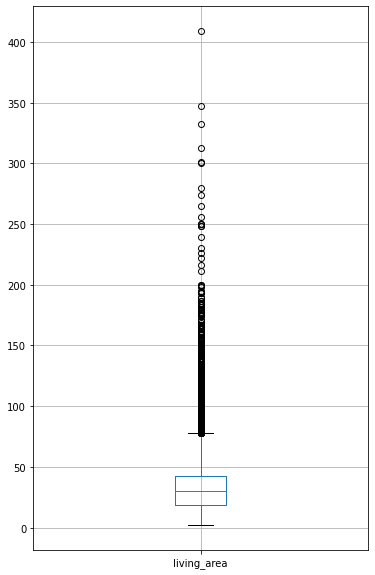

In [ ]:
data.boxplot(column=['living_area'], figsize=(6, 10))

<AxesSubplot:>

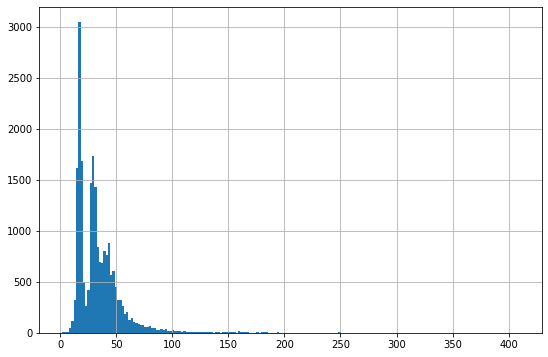

In [ ]:
data['living_area'].hist(figsize=(9,6), bins=200)

In [ ]:
data['living_area'].isna().sum()

1897

- В данных присутствуют неправдоподобно низкие значения и пропуски. Возьмём за минимальное значение жилой площади 18 квадратных метров и посмотрим, что находится ниже этого значения.

In [ ]:
data.query('living_area < 18').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23536,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
6933,6,14400000,100.7,2015-09-24,1,2.65,5,16.4,1,NaN,False,False,43.4,NaN,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
23356,10,1600000,92.0,2018-07-10,3,3.00,6,13.0,1,NaN,False,False,10.0,NaN,Санкт-Петербург,20881.0,4465.0,1.0,937.0,3.0,167.0,3.0
13772,9,4999000,85.2,2015-11-02,1,2.65,4,15.7,1,False,False,False,14.6,0.0,Сестрорецк,54104.0,35204.0,0.0,NaN,0.0,NaN,280.0
12416,10,7950000,78.9,2018-02-14,3,2.65,5,16.6,3,NaN,False,False,10.5,NaN,Санкт-Петербург,23071.0,4336.0,1.0,659.0,1.0,266.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9396,5,2100000,16.0,2017-12-10,1,2.65,6,13.0,1,NaN,False,True,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
8871,10,2450000,15.5,2018-08-22,1,2.65,5,10.0,2,NaN,True,False,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
19612,5,1190000,14.0,2018-07-29,1,2.65,5,11.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
19777,0,3800000,13.0,2018-07-04,1,2.65,5,10.0,3,NaN,False,False,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0


In [ ]:
data.loc[[23536]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23536,14,64990000,139.0,2015-11-24,3,3.0,8,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


- Выше хороший пример того, что с данными что-то не так. Общая площадь квартиры 139 квадратных метров, 3 комнаты и всего 3  квадратных метра жилой площади. Будем считать, что жилая площать составляет 75% от общей площади (у квартир с большей прощадью, отношение общей площади к жилой, рассчитано именно так).

In [ ]:
for count in data['living_area']:
    if count < 18:
        data['living_area'] = data['total_area'] * 0.75

In [ ]:
data.query('living_area < 18 and rooms > 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4068,10,3000000,20.0,2017-04-10,2,2.65,6,15.0,2,NaN,False,False,5.6,0.0,Санкт-Петербург,28450.0,6996.0,2.0,223.0,1.0,611.0,16.0


- С жилой прощадью менее 18 квадратных метров у нас всего одна квартира, где количество комнат более 1.

In [ ]:
data.query('living_area < 18 and rooms == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000,21.40,2019-02-07,1,2.90,8,16.0500,7,NaN,False,False,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
545,9,4700000,23.80,2018-12-28,1,2.65,18,17.8500,9,NaN,False,False,5.0,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
716,5,1500000,17.00,2017-06-07,1,2.70,9,12.7500,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
945,5,2200000,23.00,2016-09-27,1,2.65,27,17.2500,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1191,14,2520000,22.70,2018-08-31,1,2.65,14,17.0250,5,NaN,False,False,NaN,NaN,Санкт-Петербург,22735.0,11907.0,1.0,1065.0,1.0,484.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22347,10,2850000,22.23,2017-07-06,1,2.65,14,16.6725,2,NaN,False,False,5.0,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,533.0
22484,5,2350000,23.39,2018-08-28,1,2.65,17,17.5425,13,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,49.0
22643,4,2100000,23.60,2016-02-25,1,2.75,25,17.7000,23,NaN,False,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,119.0
23153,3,1900000,18.90,2016-04-04,1,2.65,16,14.1750,12,NaN,False,False,NaN,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


- Все остальные являются однокомнатными, вполне вероятно, что это студии. Жилая площадь студии рассчитывается как разница между общим метражом и площадью санузла. Как пример, строка 114, общая площать 21.40М, жилая 16.05М, нежилая 5.35М, выглядит реально. 


In [ ]:
data['living_area'].describe()

count    23660.000000
mean        44.934620
std         25.057691
min          9.000000
25%         30.000000
50%         39.000000
75%         52.200000
max        442.500000
Name: living_area, dtype: float64

In [ ]:
data.query('living_area > 18 and (rooms > 1 and rooms <3)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2,10,5196000,56.00,2015-08-20,2,2.65,5,42.0000,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,75.0000,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,53.7000,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
11,9,3300000,44.00,2018-08-27,2,2.65,5,33.0000,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000,54.00,2016-06-30,2,2.65,5,40.5000,5,NaN,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23643,13,5250000,43.00,2018-05-11,2,2.65,5,32.2500,2,NaN,False,False,6.0,NaN,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23652,3,5500000,52.00,2018-07-19,2,2.65,5,39.0000,2,NaN,False,False,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23653,11,9470000,72.90,2016-10-13,2,2.75,25,54.6750,7,NaN,False,False,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23658,18,2500000,56.70,2018-02-11,2,2.65,3,42.5250,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.query('living_area > 18 and rooms > 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
26,6,4050000,60.0,2017-04-28,4,2.65,5,45.00,4,NaN,False,False,7.0,NaN,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0
33,8,4800000,73.0,2018-10-15,4,2.65,9,54.75,5,NaN,False,False,6.5,NaN,Колпино,26535.0,32321.0,0.0,NaN,0.0,NaN,92.0
35,6,15500000,149.0,2017-06-26,5,2.65,5,111.75,4,NaN,False,False,17.0,NaN,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
42,13,22000000,161.8,2015-07-08,4,2.80,4,121.35,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
52,20,11795000,136.0,2017-09-22,6,3.00,2,102.00,2,NaN,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23584,15,7490000,114.0,2018-08-13,4,3.15,4,85.50,4,NaN,False,False,12.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,245.0
23625,12,6400000,88.0,2018-01-12,4,2.65,10,66.00,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23626,5,9000000,110.0,2015-12-10,4,3.36,7,82.50,5,NaN,False,False,15.8,NaN,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0
23645,16,2100000,62.8,2018-09-18,4,2.65,5,47.10,3,NaN,False,False,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

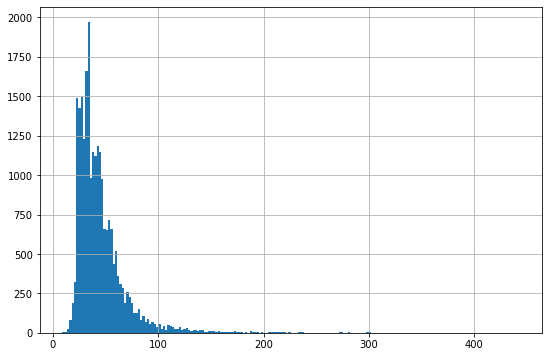

In [ ]:
data['living_area'].hist(figsize=(9,6), bins=200)

In [ ]:
data.query('total_area > 30 and (living_area < total_area * 0.75)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- Теперь всё в порядке.

**Этаж. floor.** <a id='floor'></a> 

In [ ]:
data['floor'].describe()

count    23660.000000
mean         5.892223
std          4.885264
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

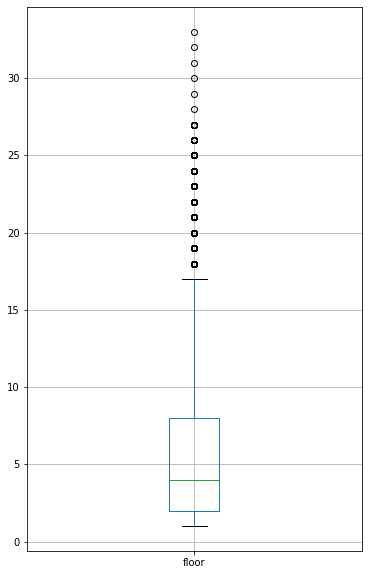

In [ ]:
data.boxplot(column=['floor'], figsize=(6, 10))

<AxesSubplot:>

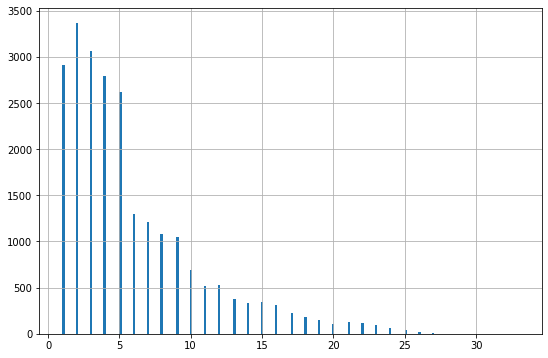

In [ ]:
data['floor'].hist(figsize=(9,6), bins=200)

In [ ]:
data['floor'].isna().sum()

0

In [ ]:
data.query('floor == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- Здесь всё в порядке.

**Апартаменты. is_apartment** <a id='is_apartment'></a> 

In [ ]:
data['is_apartment'].describe()

count      2771
unique        2
top       False
freq       2721
Name: is_apartment, dtype: object

In [ ]:
data['is_apartment'].isna().sum()

20889

- В строках где мы имеем пропущенные значения, скорее всего имеется в виду, что это не апартаменты. Заполним такие пропуски на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Верное решение!</div>


In [ ]:
data['is_apartment'].value_counts()

False    23610
True        50
Name: is_apartment, dtype: int64

**Студия. studio** <a id='studio'></a>                


In [ ]:
data['studio'].describe()

count     23660
unique        2
top       False
freq      23511
Name: studio, dtype: object

In [ ]:
data['studio'].isna().sum()

0

In [ ]:
data['studio'].value_counts()

False    23511
True       149
Name: studio, dtype: int64

- Здесь всё в порядке, пропущенных значений нет, менять ничего не будем.

**Открытая планировка. open_plan** <a id='open_plan'></a>

In [ ]:
data['open_plan'].describe()

count     23660
unique        2
top       False
freq      23594
Name: open_plan, dtype: object

In [ ]:
data['open_plan'].isna().sum()

0

In [ ]:
data['open_plan'].value_counts()

False    23594
True        66
Name: open_plan, dtype: int64

- Здесь всё в порядке, пропущенных значений нет, менять ничего не будем.

**Площадь кухни. kitchen_area.** <a id='kitchen_area'></a>


In [ ]:
data['kitchen_area'].describe()

count    21389.000000
mean        10.526017
std          5.743847
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

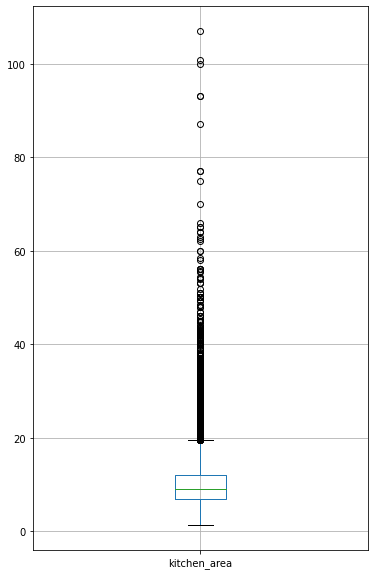

In [ ]:
data.boxplot(column=['kitchen_area'], figsize=(6, 10))

<AxesSubplot:>

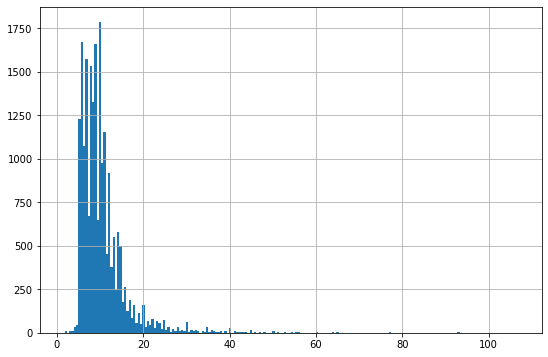

In [ ]:
data['kitchen_area'].hist(figsize=(9,6), bins=200)

In [ ]:
data['kitchen_area'].isna().sum()

2271

In [ ]:
data.query('kitchen_area < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20186,7,4250000,28.5,2019-05-01,1,2.8,14,21.375,10,False,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN


In [ ]:
apass = pd.isna(data['kitchen_area'])
data[apass].sort_values(by='total_area').head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19873,4,2400000,12.0,2017-07-19,1,2.65,5,9.00,2,False,False,False,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19516,3,1850000,13.0,2019-03-11,1,3.40,5,9.75,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19777,0,3800000,13.0,2018-07-04,1,2.65,5,9.75,3,False,False,False,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
17933,3,1400000,13.0,2017-12-03,1,2.65,9,9.75,1,False,False,False,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19528,2,1686000,13.2,2018-12-17,1,2.65,5,9.90,1,False,False,False,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0


- Вероятно, пропуски содержатся в строках, где кухня совмещена с комнатой. Заполним такие строки нулевым значением.

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Почему ты считаешь, что такая замена корректна? 
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Если посмотреть на примере "микроквартир" с учётом общей площади и жилой, "вставить" дополнительно площадь кухни мы не сможем. Пример, общая площадь 12м, жилая 9м, сводных у нас остаётся всего 3м и если кухня может быть совмещена с комнатой, то санузел, явно должен располагаться отдельно. Такие пропуски мы либо заполняем нулевым значением, либо в общем избавляемся от таких квартир, но удалять такие квартиры, смысла я не вижу, это не что-то на столько редкое, от чего нам стоит избавиться. Для квартир большей площади, конечно можно более детально просмотреть данные и найти какое-то решение, но площадь кухни, по большей части, может повлиять на стоимость только в связи с общей площадью. Зависимость стоимости квартиры и площади кухни, прослеживается потому, что чем больше площадь кухни, тем больше площадь квартиры в целом. Как вариант, у нас остаётся оставление пропусков без заполнения чем-либо.   </div> 


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Вообще пропуски в площади кухни можно восстановить через коэффициент отношения. Проще всего действительно оставить без изменения </div>

In [ ]:
data.query('kitchen_area != 0 and kitchen_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13,20,3550000,42.8,2017-07-01,2,2.65,5,32.100,5,False,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
18,8,3250000,31.0,2017-01-27,1,2.65,5,23.250,2,False,False,False,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
21,13,3200000,31.6,2018-03-14,1,2.65,5,23.700,2,False,False,False,5.7,1.0,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0
47,17,3600000,56.1,2018-10-18,3,2.65,4,42.075,3,False,False,False,5.7,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
64,13,3100000,44.3,2017-11-07,2,2.65,5,33.225,5,False,False,False,5.3,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,1,2950000,53.6,2018-02-01,2,2.75,3,40.200,3,False,False,False,5.8,1.0,Красное Село,38293.0,41718.0,0.0,NaN,0.0,NaN,35.0
23635,9,3100000,23.0,2018-03-19,1,2.80,9,17.250,1,False,False,False,5.0,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0
23640,10,3500000,43.0,2016-05-19,2,2.65,3,32.250,2,False,False,False,4.9,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0
23645,16,2100000,62.8,2018-09-18,4,2.65,5,47.100,3,False,False,False,5.5,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Площадь квартир социального использования согласно ЖК РФ должна быть не менее:... Кухонной зоны в кухне-столовой — 6м². У нас есть значения меньше, конечно, возможно площадь поменялась после перепланировки квартиры, но значения вроде 1м² или 2м², смотрятся не совсем реально. Заменим такие значения на минимальные, т.е. 6 м².

In [ ]:
data.loc[(data['kitchen_area'] != 0) & (data['kitchen_area'] < 6), 'kitchen_area'] = 6

In [ ]:
data.sort_values(by='kitchen_area', ascending=False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20184,2,85000000,249.70,2018-02-01,3,2.65,10,187.275,9,False,False,False,107.0,4.0,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0
2482,9,12500000,255.00,2017-04-21,3,2.65,2,191.250,2,False,False,False,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
5348,20,65000000,590.00,2019-02-14,15,3.50,6,442.500,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
16215,5,82400000,181.10,2017-05-24,3,3.90,9,135.825,4,False,False,False,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
16770,9,65850000,146.00,2017-07-14,2,2.65,9,109.500,3,False,False,False,93.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,0,3200000,31.00,2017-06-28,1,2.65,6,23.250,4,False,False,False,0.0,NaN,Санкт-Петербург,39313.0,8573.0,0.0,NaN,0.0,NaN,261.0
6865,4,1300000,44.00,2018-02-07,2,2.65,2,33.000,1,False,False,False,0.0,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16052,1,6300000,88.00,2018-11-02,3,2.65,9,66.000,1,False,False,False,0.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,107.0
2324,9,7300000,61.00,2017-12-15,2,2.65,11,45.750,6,False,False,False,0.0,NaN,Санкт-Петербург,24327.0,5954.0,0.0,NaN,2.0,515.0,60.0


In [ ]:
data.query('kitchen_area > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,81.0000,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,75.0000,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
51,7,45000000,161.00,2017-10-17,3,3.20,8,120.7500,4,False,False,False,50.00,NaN,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
110,6,3850000,72.30,2017-09-29,2,2.65,3,54.2250,2,False,False,False,23.60,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
121,20,33000000,180.00,2017-02-17,3,2.90,9,135.0000,8,False,False,False,24.00,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,20,21800000,250.00,2017-09-16,3,2.65,12,187.5000,7,False,False,False,45.00,0.0,Санкт-Петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0
23469,4,7360000,73.83,2018-06-23,2,2.65,21,55.3725,17,False,False,False,21.55,NaN,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,103.0
23511,5,19600000,184.00,2016-04-21,3,3.00,19,138.0000,19,False,False,False,24.50,5.0,Санкт-Петербург,18995.0,4837.0,0.0,NaN,0.0,NaN,205.0
23552,0,21187872,123.30,2017-04-25,3,2.65,<NA>,92.4750,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


- Есть квартиры где размер кухни слишком большой, вероятно, в этих случаях одна из комнат совмещена с кухней, по этому мы имеем такие значения. Мы конечно можем их заменить на ноль, как делали ранее, но, думаю, стоит пока оставить как есть и не использовать эти данные при исследовании. 

**Балкон. balcony.** <a id='balcony'></a>

In [ ]:
data['balcony'].describe()

count    12160.000000
mean         1.150493
std          1.070836
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

<AxesSubplot:>

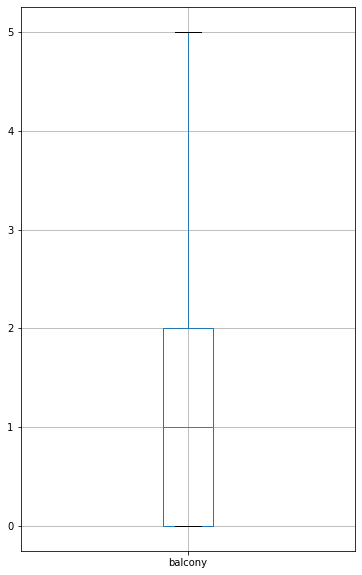

In [ ]:
data.boxplot(column=['balcony'], figsize=(6, 10))

<AxesSubplot:>

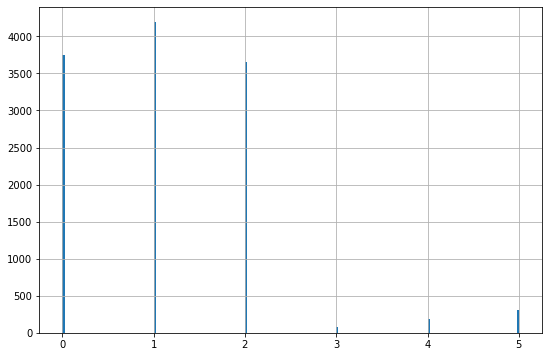

In [ ]:
data['balcony'].hist(figsize=(9,6), bins=200)

In [ ]:
data['balcony'].isna().sum()

11500

- Пропущенные значения скорее всего равны отсутствию балкона, заменим их на нулевое значение. Также, поменяем тип данных.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
data['balcony'] = data['balcony'].astype('Int64')

- Теперь порядок.

**Населённый пункт. locality_name** <a id='locality_name'></a>

In [ ]:
data['locality_name'].describe()

count               23611
unique                364
top       Санкт-Петербург
freq                15682
Name: locality_name, dtype: object

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург      15682
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
                     ...  
деревня Лупполово        1
деревня Тихковицы        1
деревня Терпилицы        1
деревня Рапполово        1
деревня Зимитицы         1
Name: locality_name, Length: 364, dtype: int64

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('село', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('городского', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('типа', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('городской', '')

In [ ]:
data['locality_name'] = data['locality_name'].str.strip()

In [ ]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна',

In [ ]:
data['locality_name'].isna().sum()

49

In [ ]:
data['locality_name'].describe()

count               23611
unique                311
top       санкт-петербург
freq                15682
Name: locality_name, dtype: object

- После удаления неявных дубликатов число уникальных значений с 364 снизилось до 311. Осталось ещё 49 пропущенных значений, их не столь много, на конечный результат повлиять не должны, оставим как есть. 


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Супер! Избавление от неявных дубликатов прошло успешно</div>


**Расстояние до ближайшего аэропорта. airports_nearest** <a id='airports_nearest'></a>	

In [ ]:
data['airports_nearest'].describe()

count    18119.000000
mean     28798.165903
std      12642.118489
min          0.000000
25%      18573.500000
50%      26737.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

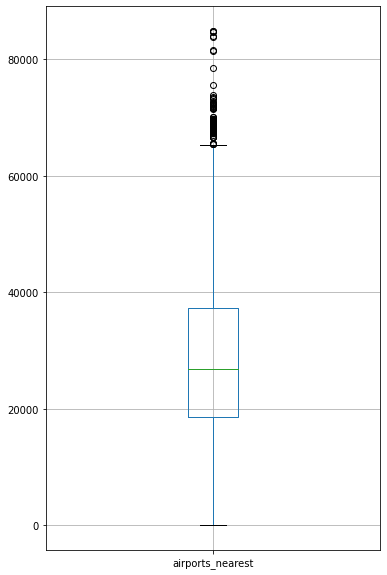

In [ ]:
data.boxplot(column=['airports_nearest'], figsize=(6, 10))

<AxesSubplot:>

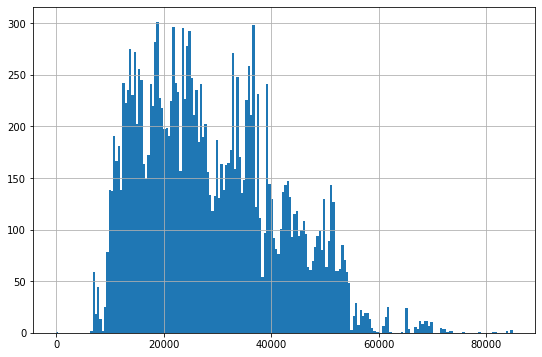

In [ ]:
data['airports_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
data['airports_nearest'].isna().sum()

5541

In [ ]:
data['airports_nearest'] = data['airports_nearest'].astype('Int64')

In [ ]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21051,0,7000000,34.7,2018-09-23,1,2.7,9,26.025,3,False,False,False,6.0,2,санкт-петербург,0,22801.0,0.0,NaN,0.0,NaN,60.0


In [ ]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [ ]:
data['airports_nearest'] = data['airports_nearest'] / 1000

In [ ]:
data['airports_nearest'].describe()

count    18118.000000
mean        28.799755
std         12.640657
min          6.450000
25%         18.574000
50%         26.743500
75%         37.294000
max         84.869000
Name: airports_nearest, dtype: float64

- Есть пропущенные значения, возможно потому, что ближайший аэропорт находится слишком далеко, пропуски оставим без изменений. Строку с нулевым значением заменили на None, т.к. в данном столбце нулевого значения быть не может. Тип данных привели к целочисленному. Метры перевели в километры.

**Расстояние до центра. city_centers_nearest** <a id='city_centers_nearest'></a>

In [ ]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [ ]:
data['city_centers_nearest'].describe()

count    18142.000000
mean     14211.747933
std       8605.174832
min        181.000000
25%       9267.000000
50%      13114.000000
75%      16297.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

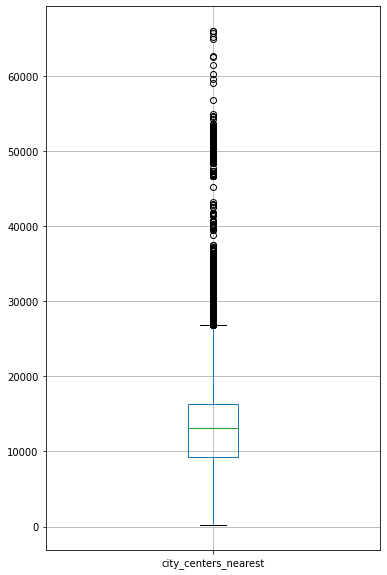

In [ ]:
data.boxplot(column=['city_centers_nearest'], figsize=(6, 10))

<AxesSubplot:>

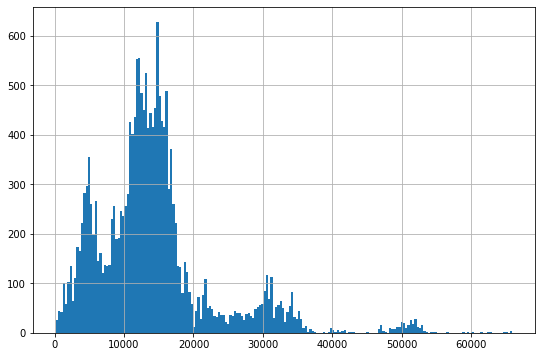

In [ ]:
data['city_centers_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype('Int64')

In [ ]:
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000

In [ ]:
data['city_centers_nearest'].isna().sum()

5518

In [ ]:
data['city_centers_nearest'].describe()

count    18142.000000
mean        14.211748
std          8.605175
min          0.181000
25%          9.267000
50%         13.114000
75%         16.297500
max         65.968000
Name: city_centers_nearest, dtype: float64

- Как и в столбце с расстоянием до ближайшего аэропорта, поменяли вещественный тип чисел на целочисленный. Перевели метры в километры. Пропущенные значения пока оставляем.

**Количество парков в радиусе трех километров. parks_around** <a id='parks_around'></a>

In [ ]:
data.rename(columns={'parks_around3000': 'parks_around'}, inplace=True) 

- Сразу изменили название столбца и превели к общему виду.

In [ ]:
data['parks_around'].describe()

count    18143.000000
mean         0.609491
std          0.800116
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around, dtype: float64

<AxesSubplot:>

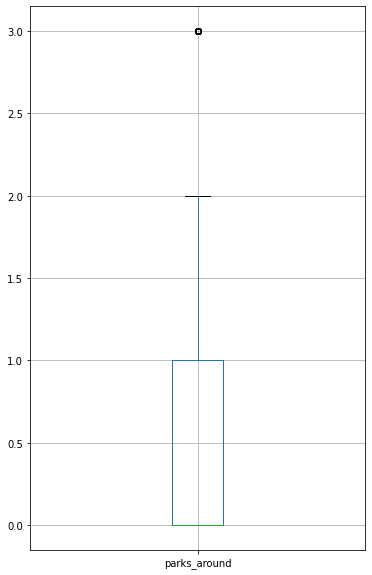

In [ ]:
data.boxplot(column=['parks_around'], figsize=(6, 10))

<AxesSubplot:>

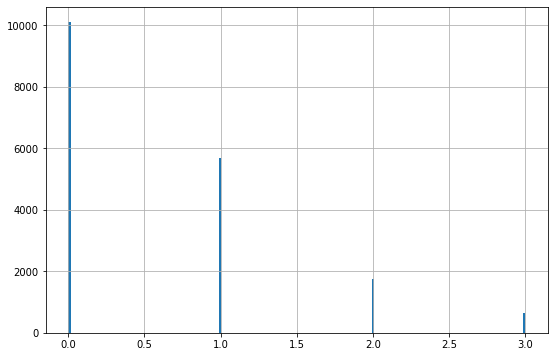

In [ ]:
data['parks_around'].hist(figsize=(9,6), bins=200)

In [ ]:
data['parks_around'].isna().sum()

5517

- Пропущенные значения заменим на нулевые, т.к. пропущенное значение, скорее всего равняется нулю. 

In [ ]:
data['parks_around'] = data['parks_around'].fillna(0)

In [ ]:
data['parks_around'] = data['parks_around'].astype('Int64')

- Изменили тип данных на целочисленные. Заполнили пропуски. В остальном, всё в порядке.

**Расстояние до ближайшего парка. parks_nearest.** <a id='parks_nearest'></a>

In [ ]:
data['parks_nearest'].describe()

count    8051.000000
mean      491.053906
std       342.678407
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

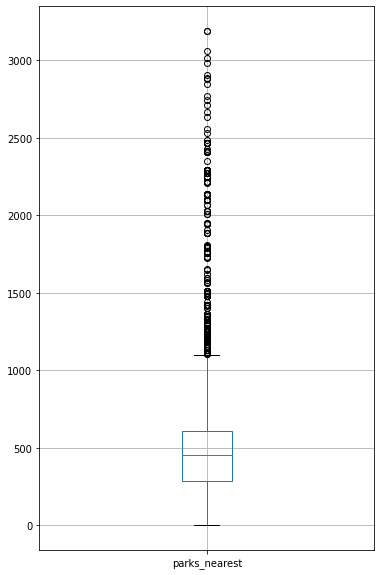

In [ ]:
data.boxplot(column=['parks_nearest'], figsize=(6, 10))

<AxesSubplot:>

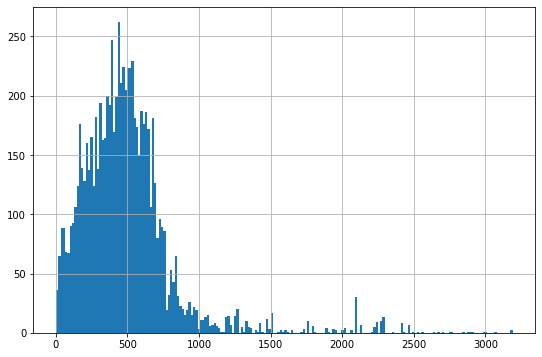

In [ ]:
data['parks_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
data['parks_nearest'].isna().sum()

15609

- Значений пропущено больше чем в столбце с количеством парков в радиусе 3км. 

- Сразу изменим тип данных.

In [ ]:
data['parks_nearest'] = data['parks_nearest'].astype('Int64')

- Есть строка со значением 1 метр до парка, возможно он действительно находится очень близко, но лучше сделаем эту строку более реальной, увеличим значение до 10 метров.

In [ ]:
data.loc[data['parks_nearest'] == 1, 'parks_nearest'] = 10

- Переведём всё в киллометры.

In [ ]:
data['parks_nearest'] = data['parks_nearest'] / 1000

In [ ]:
data.pivot_table(index='parks_nearest', values='parks_around', aggfunc=['count', 'max', 'min'])

,count,max,min
,parks_around,parks_around,parks_around
parks_nearest,,,
0.003,1,1,1
0.004,1,3,3
0.007,1,1,1
0.009,2,3,2
0.010,8,2,1
...,...,...,...
2.905,1,1,1
2.984,1,1,1


- С учётом наличия данных о присутствии парков в радиусе 3км, думаю, данный столбец в какой-то степени имеет смысл только для определения расстояния в пределах этих же 3км. Вряд ли наличие парка в 6 или 9км от квартиры сильно скажется на стоимости. Пока оставим этот столбец как есть, возможно, вернёмся к нему позже.

**Водоёмы в радиусе трех километров. ponds_around** <a id='ponds_around'></a>

In [ ]:
data.rename(columns={'ponds_around3000': 'ponds_around'}, inplace=True)

- Сразу приводим столбец к общему виду.

In [ ]:
data['ponds_around'].describe()

count    18143.000000
mean         0.767734
std          0.936503
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around, dtype: float64

<AxesSubplot:>

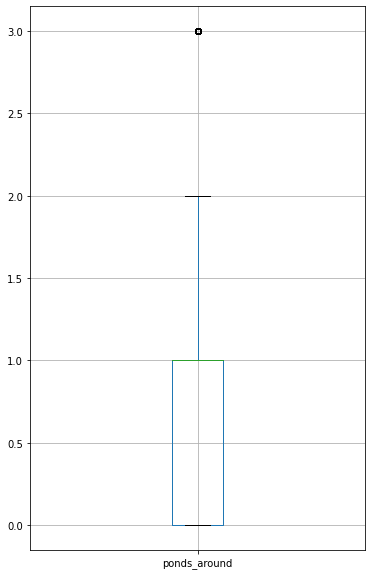

In [ ]:
data.boxplot(column=['ponds_around'], figsize=(6, 10))

<AxesSubplot:>

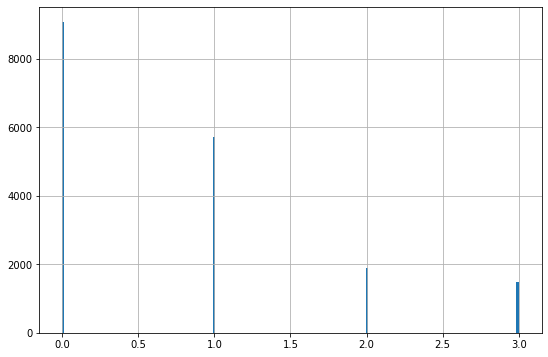

In [ ]:
data['ponds_around'].hist(figsize=(9,6), bins=200)

In [ ]:
data['ponds_around'].isna().sum()

5517

- Есть пропущенные значения, будем считать проски в данных за отсутствие водоёмов в радиусе 3км и заменим на нулевое значение. В остальном, всё в порядке.


In [ ]:
data['ponds_around'] = data['ponds_around'].fillna(0)

**Расстояние до ближайшего водоёма. ponds_nearest.** <a id='ponds_nearest'></a>

In [ ]:
data['ponds_nearest'].describe()

count    9076.000000
mean      518.652380
std       277.809215
min        13.000000
25%       295.000000
50%       503.000000
75%       730.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:>

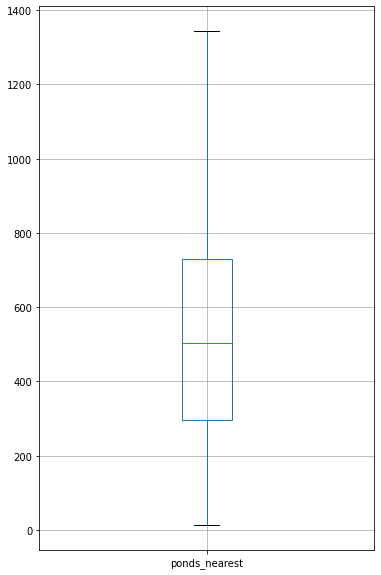

In [ ]:
data.boxplot(column=['ponds_nearest'], figsize=(6, 10))

<AxesSubplot:>

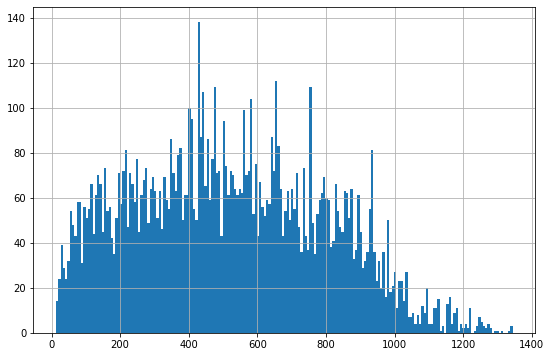

In [ ]:
data['ponds_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
data['ponds_nearest'].isna().sum()

14584

- Ситуация с водоёмами аналогична паркам. Поменяем только тип данных, остальное пока оставим как есть.

In [ ]:
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')

**Сколько дней было размещено объявление. days_exposition.** <a id='days_exposition'></a>

In [ ]:
data['days_exposition'].describe()

count    20484.000000
mean       180.654364
std        219.563812
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

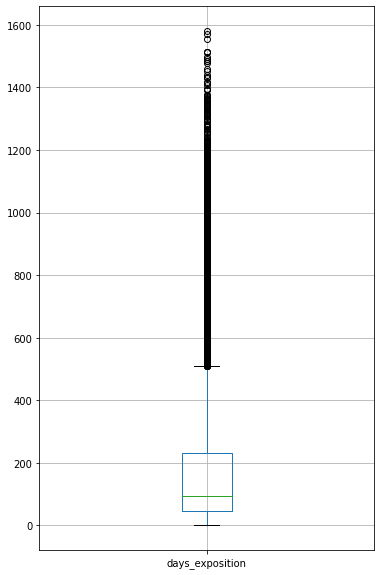

In [ ]:
data.boxplot(column=['days_exposition'], figsize=(6, 10))

<AxesSubplot:>

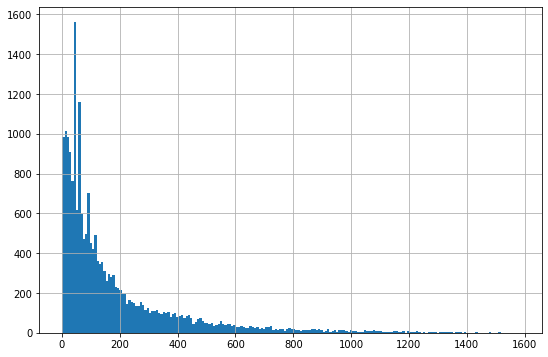

In [ ]:
data['days_exposition'].hist(figsize=(9,6), bins=200)

In [ ]:
data['days_exposition'].isna().sum()

3176

- Пропуски есть, но для данного столбца, заполнить их не удастся. Укажем None там, где данные отсутствуют.

In [ ]:
data.loc[data['days_exposition'] == 0, 'days_exposition'] = None

In [ ]:
data.query('days_exposition > 600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
23,11,2950000,32.00,2016-10-29,1,2.65,9,24.0000,9,False,False,False,6.1,0,санкт-петербург,15.414,14.211,2,0.517,1.0,190,615.0
35,6,15500000,149.00,2017-06-26,5,2.65,5,111.7500,4,False,False,False,17.0,0,санкт-петербург,23.67,3.502,0,<NA>,1.0,779,644.0
42,13,22000000,161.80,2015-07-08,4,2.80,4,121.3500,2,False,False,False,17.6,5,петергоф,35.416,30.605,2,0.047,1.0,907,987.0
43,13,9330000,48.00,2017-01-10,2,3.00,4,36.0000,4,False,False,False,7.5,0,санкт-петербург,15.016,10.822,0,<NA>,1.0,492,763.0
61,18,7990000,74.00,2017-08-24,2,2.65,4,55.5000,4,False,False,False,20.0,0,санкт-петербург,22.568,4.288,1,0.363,0.0,<NA>,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,1,2414306,40.50,2016-09-08,1,2.65,18,30.3750,10,False,False,False,0.0,0,никольское,<NA>,<NA>,0,<NA>,0.0,<NA>,627.0
23626,5,9000000,110.00,2015-12-10,4,3.36,7,82.5000,5,False,False,False,15.8,0,санкт-петербург,26.313,5.016,3,0.417,1.0,118,816.0
23634,5,3000000,30.80,2016-06-08,1,2.65,5,23.1000,3,False,False,False,6.3,0,санкт-петербург,44.614,14.193,2,0.258,0.0,<NA>,808.0
23637,8,3550000,39.50,2016-10-03,1,2.65,16,29.6250,13,False,False,False,8.5,0,санкт-петербург,25.74,14.951,0,<NA>,0.0,<NA>,721.0


In [ ]:
data['days_exposition'].max()

1580.0

- Есть квартиры, объёявления по которым, были размещены очень долго. Конечно, какая-то недвижимость действительно может продаваться очень долго, а может после фактической продажи квартиры, продавец просто забывал снять объявление. Удалять строки с таким значениями не хочется, т.к. их достаточно много, но если оставим как есть, это повлияет на результаты исследования, к тому же, один из поставленные вопросов, это сколько дней было размещено каждое объявление. Думаю, строки оставим, чтобы не терять данные, но при исследовании вопроса о том как быстро продавались квартиры, учитывать их не будем.

**Посмотри на итоговую таблицу после предобработки** <a id='itog'></a>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23660 entries, 0 to 23660
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23660 non-null  int64         
 1   last_price            23660 non-null  Int64         
 2   total_area            23660 non-null  float64       
 3   first_day_exposition  23660 non-null  datetime64[ns]
 4   rooms                 23660 non-null  int64         
 5   ceiling_height        23660 non-null  float64       
 6   floors_total          23574 non-null  Int64         
 7   living_area           23660 non-null  float64       
 8   floor                 23660 non-null  int64         
 9   is_apartment          23660 non-null  bool          
 10  studio                23660 non-null  bool          
 11  open_plan             23660 non-null  bool          
 12  kitchen_area          23660 non-null  float64       
 13  balcony         

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,81.000,8,False,False,False,25.00,0,санкт-петербург,18.863,16.028,1,0.482,2.0,755,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,30.300,1,False,False,False,11.00,2,шушары,12.817,18.603,0,<NA>,0.0,<NA>,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,42.000,4,False,False,False,8.30,0,санкт-петербург,21.741,13.933,1,0.09,2.0,574,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,119.250,9,False,False,False,0.00,0,санкт-петербург,28.098,6.8,2,0.084,3.0,234,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,75.000,13,False,False,False,41.00,0,санкт-петербург,31.856,8.098,2,0.112,1.0,48,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,22.800,5,False,False,False,9.10,0,янино-1,<NA>,<NA>,0,<NA>,0.0,<NA>,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,27.975,6,False,False,False,14.40,1,парголово,52.996,19.143,0,<NA>,0.0,<NA>,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,53.700,22,False,False,False,18.90,2,санкт-петербург,23.982,11.634,0,<NA>,0.0,<NA>,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,24.870,26,False,False,False,8.81,0,мурино,<NA>,<NA>,0,<NA>,0.0,<NA>,189.0
9,18,5400000,61.00,2017-02-26,3,2.65,9,45.750,7,False,False,False,6.50,2,санкт-петербург,50.898,15.008,0,<NA>,0.0,<NA>,289.0



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Спасибо за такой основательный, фундаментальный подход к предобработке датасета!</div>


### Посчитайте и добавьте в таблицу новые столбцы

**Стоимость квадратного метра. cost_meter.** <a id='cost_meter'></a> 

In [ ]:
data['cost_meter'] = data['last_price'] / data['total_area']

In [ ]:
data['cost_meter'] = data['cost_meter'].astype('Int64')

**День публикации. publication_day.** <a id='publication_day'></a>

In [ ]:
data['publication_day'] = data['first_day_exposition'].dt.weekday

**Месяц публикации. publication_month.** <a id='publication_month'></a>

In [ ]:
data['publication_month'] = data['first_day_exposition'].dt.month

**Год публикации. publication_year.** <a id='publication_year'></a>

In [ ]:
data['publication_year'] = data['first_day_exposition'].dt.year

**Тип этажа. floor_type.** <a id='floor_type'></a>

In [ ]:
data['floor_type'] = data['floor'] 

In [ ]:
data.loc[data['floor_type'] == 1, 'floor_type'] = 'первый'

In [ ]:
data.loc[data['floor_type'] == data['floors_total'], 'floor_type'] = 'последний'

In [ ]:
data.loc[data['floors_total'] == 1, 'floor_type'] = 'первый'

In [ ]:
data.loc[(data['floor_type'] != 'первый') & (data['floor_type'] != 'последний'), 'floor_type'] = 'другой'

In [ ]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_meter,publication_day,publication_month,publication_year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,81.000,8,False,False,False,25.00,0,санкт-петербург,18.863,16.028,1,0.482,2.0,755,NaN,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,30.300,1,False,False,False,11.00,2,шушары,12.817,18.603,0,<NA>,0.0,<NA>,81.0,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,42.000,4,False,False,False,8.30,0,санкт-петербург,21.741,13.933,1,0.09,2.0,574,558.0,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,119.250,9,False,False,False,0.00,0,санкт-петербург,28.098,6.8,2,0.084,3.0,234,424.0,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,75.000,13,False,False,False,41.00,0,санкт-петербург,31.856,8.098,2,0.112,1.0,48,121.0,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,22.800,5,False,False,False,9.10,0,янино-1,<NA>,<NA>,0,<NA>,0.0,<NA>,55.0,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,27.975,6,False,False,False,14.40,1,парголово,52.996,19.143,0,<NA>,0.0,<NA>,155.0,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,53.700,22,False,False,False,18.90,2,санкт-петербург,23.982,11.634,0,<NA>,0.0,<NA>,NaN,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,24.870,26,False,False,False,8.81,0,мурино,<NA>,<NA>,0,<NA>,0.0,<NA>,189.0,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.65,9,45.750,7,False,False,False,6.50,2,санкт-петербург,50.898,15.008,0,<NA>,0.0,<NA>,289.0,88524,6,2,2017,другой


- Столбец расстояние до центра города в киломметрах нет необходимости создавать, т.к. ранее, данные в столбце с расстоянием в метрах были преобразованы в киломметры.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️По этому блоку все отлично!</div>


### Проведите исследовательский анализ данных

**Общая площадь** <a id='total_area1'></a>

In [ ]:
data['total_area'].describe()

count    23660.000000
mean        59.912827
std         33.410255
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

<AxesSubplot:>

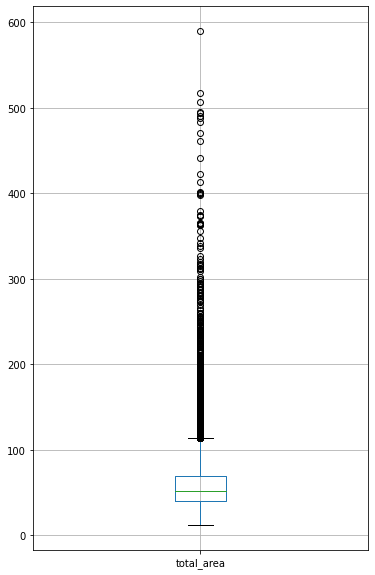

In [ ]:
data.boxplot(column=['total_area'], figsize=(6, 10))

<AxesSubplot:>

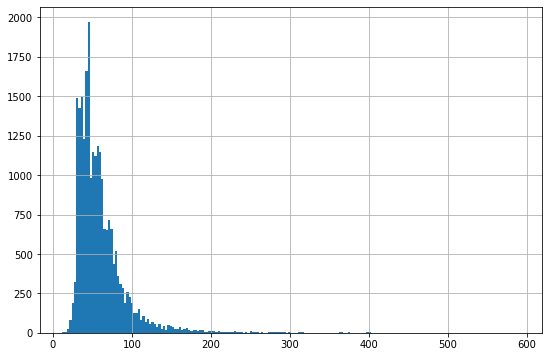

In [ ]:
data['total_area'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['total_area'].quantile(0.25)
Q3 = data['total_area'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-48.79999999999998, 158.39999999999998)

In [ ]:
data['total_area'].shape[0]

23660

In [ ]:
data[data['total_area'] < 100].shape[0]

21791

In [ ]:
data[data['total_area'] < 158].shape[0]

23210

- При проведении исследовательского анализа данных, исключим выбросы и не будем учитывать "микроквартиры". Согласно нормам СНиП рекомендуемая площадь однокомнатной квартиры 28-38м. Возьмём только значения от 28 до 158М. 

In [ ]:
final_df = data.query('total_area < 158 and total_area >= 28')

<AxesSubplot:>

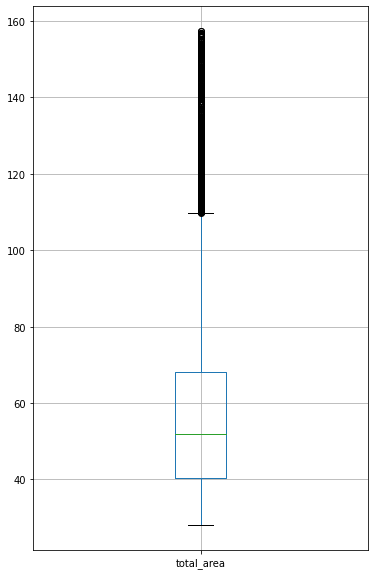

In [ ]:
final_df.boxplot(column=['total_area'], figsize=(6, 10))

Text(0, 0.5, 'Количество квартир')

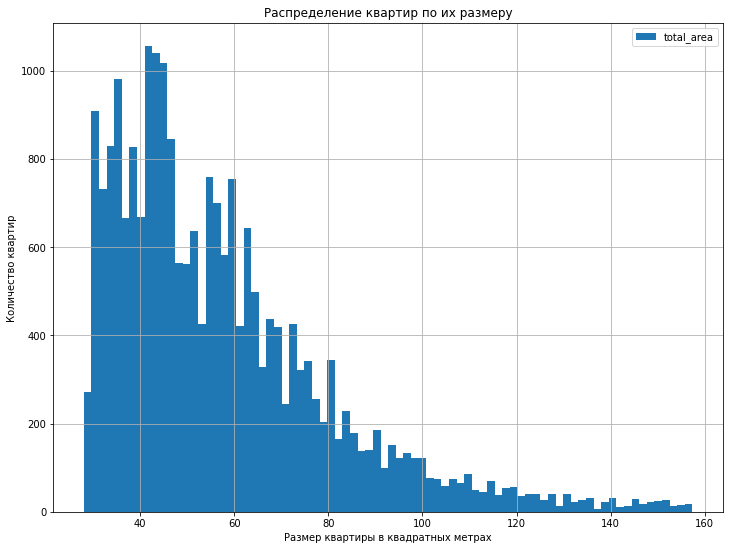

In [ ]:
final_df.plot(kind='hist', y='total_area', bins=80, grid=True, \
                          title='Распределение квартир по их размеру',figsize=(12, 9))
plt.xlabel('Размер квартиры в квадратных метрах')
plt.ylabel('Количество квартир')

In [ ]:
final_df['total_area'].describe()

count    22818.000000
mean        57.431458
std         23.388350
min         28.000000
25%         40.300000
50%         52.000000
75%         68.100000
max        157.400000
Name: total_area, dtype: float64

In [ ]:
final_df.sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_meter,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_mtr,price_meter
13200,12,2800000,28.0,2018-06-17,1,2.65,15,21.000,10,False,False,False,6.2,0,санкт-петербург,15.281,14.077,1,1.62,1.0,446,117.0,100000,6,6,2018,другой,14077.0,100000.0
13794,14,3650000,28.0,2017-08-24,1,2.65,19,21.000,10,False,False,False,6.0,2,санкт-петербург,35.068,16.167,0,<NA>,0.0,<NA>,64.0,130357,3,8,2017,другой,16167.0,130357.142857
4373,5,2880000,28.0,2019-04-04,1,2.80,24,21.000,1,False,False,False,8.0,0,бугры,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,102857,3,4,2019,первый,<NA>,102857.142857
10275,10,3300000,28.0,2019-04-08,1,2.75,23,21.000,13,False,False,False,10.0,1,санкт-петербург,22.212,17.399,0,<NA>,1.0,233,NaN,117857,0,4,2019,другой,17399.0,117857.142857
8710,11,3700000,28.0,2017-11-21,1,2.75,25,21.000,16,False,False,False,0.0,2,санкт-петербург,48.847,16.685,0,<NA>,0.0,<NA>,NaN,132142,1,11,2017,другой,16685.0,132142.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,4,67000000,156.9,2019-03-15,3,2.65,8,117.675,8,False,False,False,15.1,0,санкт-петербург,27.362,6.065,3,0.294,2.0,338,NaN,427023,4,3,2019,последний,6065.0,427023.581899
17756,3,48763000,157.0,2016-04-01,5,2.65,11,117.750,5,False,False,True,0.0,0,санкт-петербург,28.399,7.101,2,0.29,3.0,221,90.0,310592,4,4,2016,другой,7101.0,310592.356688
19056,12,14990000,157.0,2017-05-29,5,3.30,7,117.750,4,False,False,False,20.0,0,санкт-петербург,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,95477,0,5,2017,другой,<NA>,95477.707006
10444,3,26500000,157.3,2018-07-05,5,3.00,6,117.975,5,False,False,False,0.0,0,пушкин,13.52,25.674,0,<NA>,0.0,<NA>,NaN,168467,3,7,2018,другой,25674.0,168467.895741


In [ ]:
final_df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
49.44       1
35.96       1
109.80      1
44.63       1
55.06       1
Name: total_area, Length: 1781, dtype: int64

- Таким образом, средняя площадь квартир для выборки, составляет 57.4 квардратных метра. Самое большое количество квартир от 31 до 60 метров. В основном в таких квартирах от 1 до 3 комнат.


**Жилая площадь** <a id='living_area1'></a>

In [ ]:
data['living_area'].describe()

count    23660.000000
mean        44.934620
std         25.057691
min          9.000000
25%         30.000000
50%         39.000000
75%         52.200000
max        442.500000
Name: living_area, dtype: float64

<AxesSubplot:>

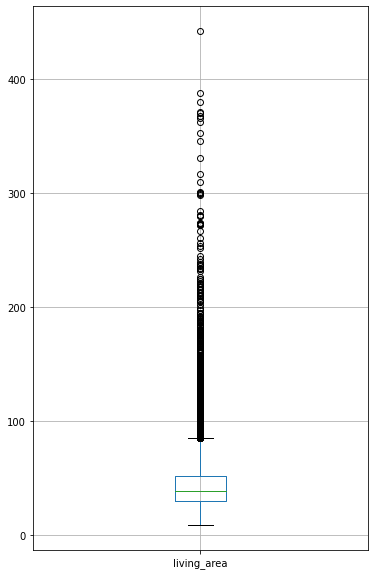

In [ ]:
data.boxplot(column=['living_area'], figsize=(6, 10))

<AxesSubplot:>

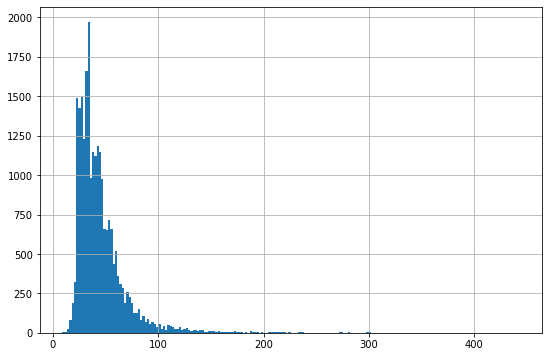

In [ ]:
data['living_area'].hist(figsize=(9,6), bins=200)

- Аналогично общей площади квартиры поступим также и с жилой площаью, избавимся от выбросов. Стандартный минимальный метраж на человека 18 квадратных метров. В предыдущем блоке, мы брали квартиры с общей площадью от 28 метров, учтём минимальную площадь кухни, которую определили на этапе предобработки 6 метров, заложим площадь санузла 4 метра и таким образом, возьмём квартиры с жилой площаью до 118 метров.

In [ ]:
data['living_area'].shape[0]

23660

In [ ]:
Q1 = data['living_area'].quantile(0.25)
Q3 = data['living_area'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR                               

(-36.599999999999994, 118.79999999999998)

In [ ]:
data[data['living_area'] < 118].shape[0]

23209

In [ ]:
final_df = data.query('living_area >= 18 and living_area < 118')


<AxesSubplot:>

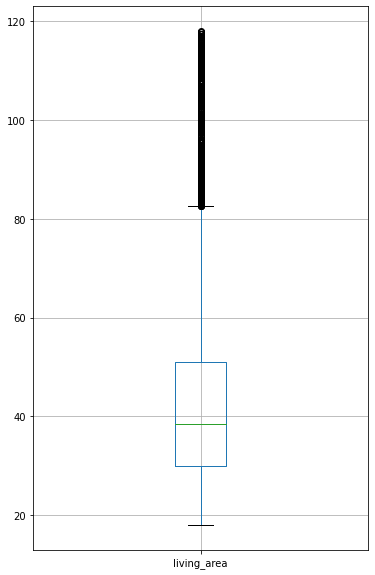

In [ ]:
final_df.boxplot(column=['living_area'], figsize=(6, 10))

In [ ]:
final_df['living_area'].describe()

count    23077.000000
mean        42.802654
std         17.615164
min         18.000000
25%         30.000000
50%         38.550000
75%         51.000000
max        117.975000
Name: living_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

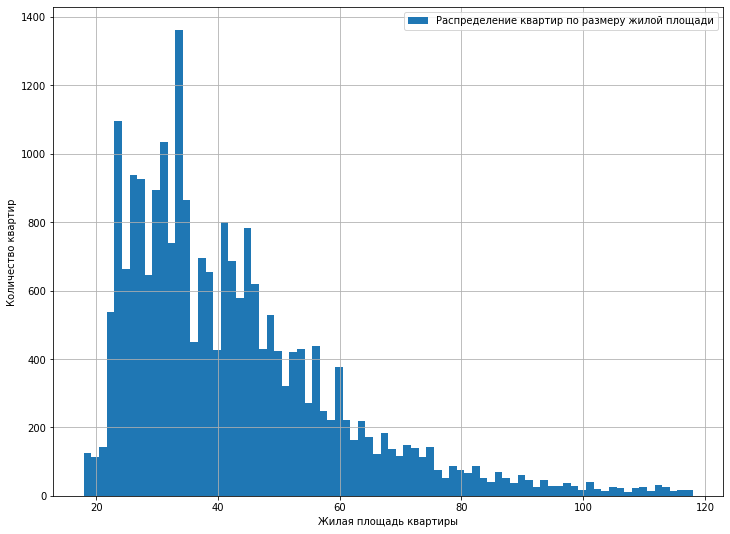

In [ ]:
final_df.plot(kind='hist', y='living_area', bins=80, \
                           label='Распределение квартир по размеру жилой площади', grid=True, figsize=(12, 9))
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Количество квартир')

- Средняя жилая площадь выборки составляет 42.8 метров.

**Площадь кухни** <a id='kitchen_area1'></a>

In [ ]:
data['kitchen_area'].describe()

count    23660.000000
mean         9.567052
std          6.246842
min          0.000000
25%          6.300000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

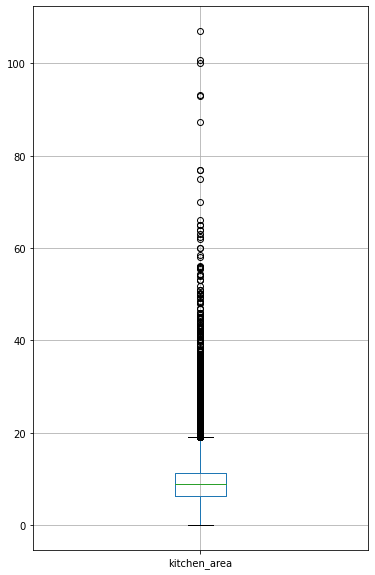

In [ ]:
data.boxplot(column=['kitchen_area'], figsize=(6, 10))

<AxesSubplot:>

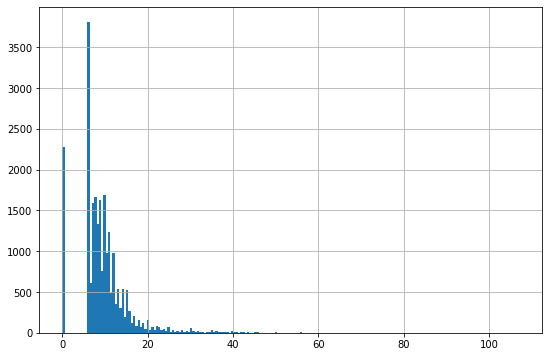

In [ ]:
data['kitchen_area'].hist(figsize=(9,6), bins=200)

- Ранее мы заменили пропущенные значения на ноль, т.к. посчитали пропущенные значения там, где кухня совмещена с комнатой, кроме того, у нас были и крайне высокие значения, которые на этапе предобработки мы менять не стали. На даном этапе, думаю, стоит исключить нулевые значения и выбросы.

In [ ]:
data['kitchen_area'].shape[0]

23660

In [ ]:
Q1 = data['kitchen_area'].quantile(0.25)
Q3 = data['kitchen_area'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-9.0, 26.700000000000003)

In [ ]:
data[data['kitchen_area'] < 26].shape[0]

23152

In [ ]:
final_df = data.query('kitchen_area > 0 and kitchen_area < 26')

<AxesSubplot:>

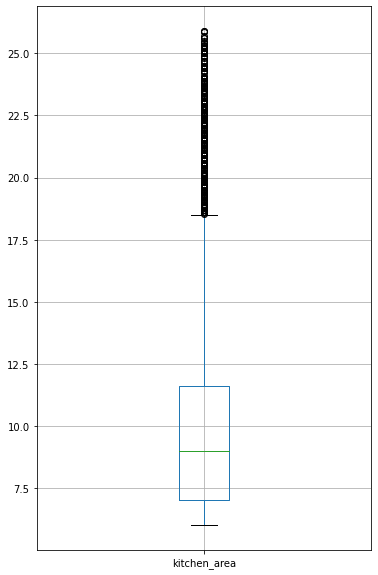

In [ ]:
final_df.boxplot(column=['kitchen_area'], figsize=(6, 10))

In [ ]:
final_df['kitchen_area'].describe()

count    20881.000000
mean         9.960497
std          3.724256
min          6.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         25.900000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

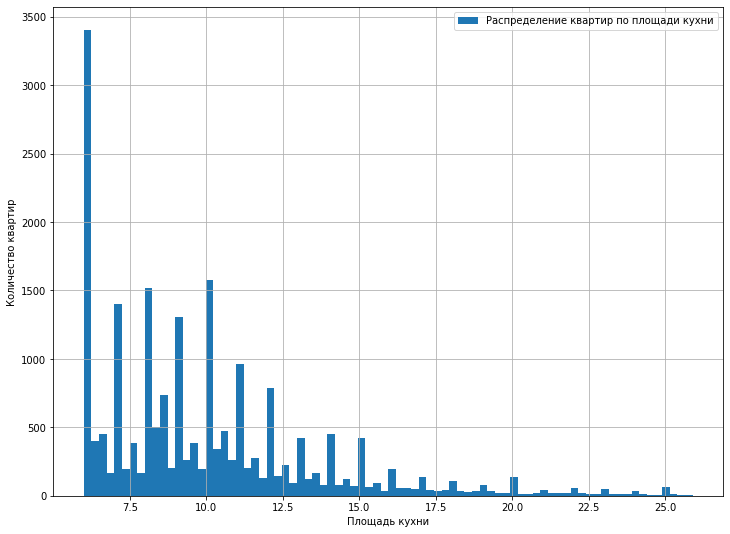

In [ ]:
final_df.plot(kind='hist', y='kitchen_area', bins=80, \
                           label='Распределение квартир по площади кухни', grid=True, figsize=(12, 9))
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')

- Большинство квартир с размером кухни 6 метров, на этапе предобработки, мы определили эту минимальную площадь для тех квартир где значения были крайне низкими. Средняя площадь составляет 9.9 метра.

**Цена объекта** <a id='last_price1'></a>

In [ ]:
data['last_price'].describe()

count    2.366000e+04
mean     6.249035e+06
std      6.410727e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.633500e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

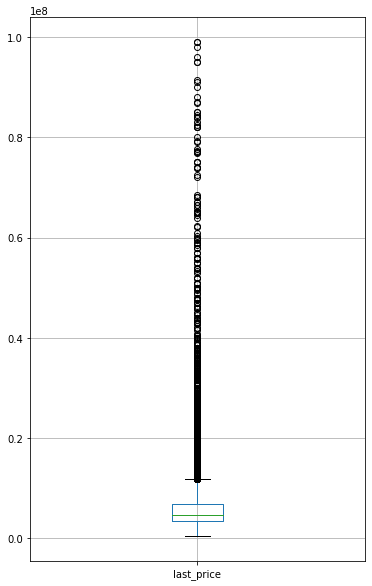

In [ ]:
data.boxplot(column=['last_price'], figsize=(6, 10))

<AxesSubplot:>

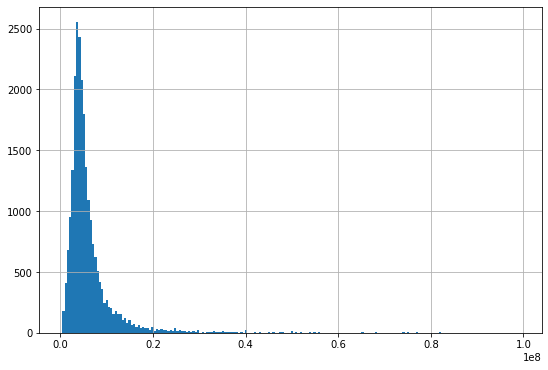

In [ ]:
data['last_price'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['last_price'].quantile(0.25)
Q3 = data['last_price'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-6650000.0, 16800000.0)

In [ ]:
data['last_price'].shape[0]

23660

In [ ]:
data[data['last_price'] < 16800000].shape[0]

22700

In [ ]:
final_df = data.query('last_price < 16800000')

<AxesSubplot:>

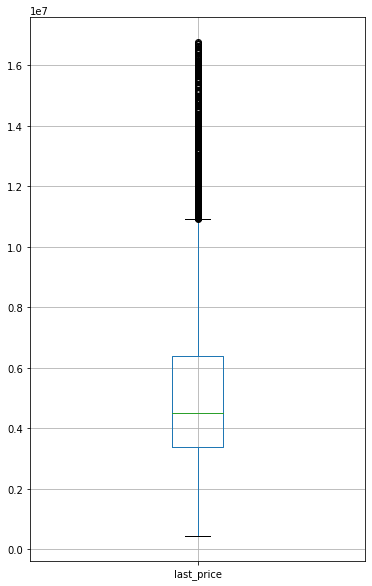

In [ ]:
final_df.boxplot(column=['last_price'], figsize=(6, 10))

In [ ]:
final_df['last_price'].describe()

count    2.270000e+04
mean     5.259109e+06
std      2.888620e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.677513e+07
Name: last_price, dtype: float64

- При финальном исследовании не стали учитывать выбросы, таким образом, средняя стоимость квартиры на момент продажи, составила 4 832 120.

**Количество комнат** <a id='rooms1'></a>

In [ ]:
data['rooms'].describe()

count    23660.000000
mean         2.074683
std          1.057241
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

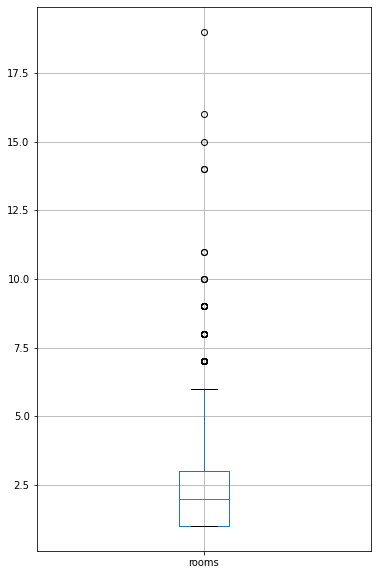

In [ ]:
data.boxplot(column='rooms', figsize=(6, 10))

<AxesSubplot:>

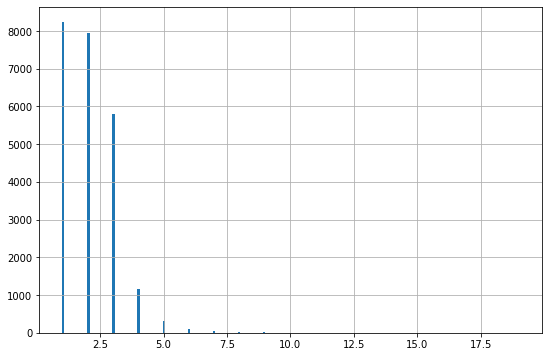

In [ ]:
data['rooms'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['rooms'].quantile(0.25)
Q3 = data['rooms'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-5.0, 9.0)

In [ ]:
data['rooms'].shape[0]

23660

In [ ]:
data[data['rooms'] < 9].shape[0]

23642

In [ ]:
final_df = data.query('rooms < 9')

<AxesSubplot:>

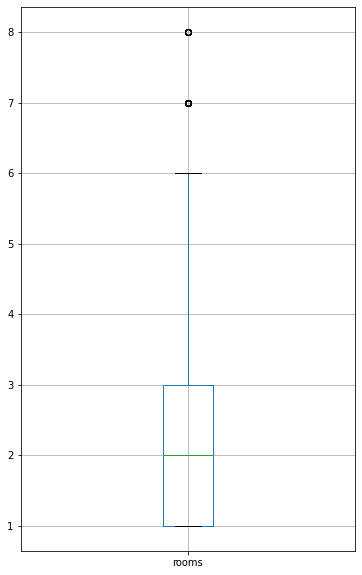

In [ ]:
final_df.boxplot(column='rooms', figsize=(6, 10))

In [ ]:
final_df['rooms'].describe()

count    23642.000000
mean         2.067718
std          1.023818
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

- Среднее количество комнат для выборки 2.

**Высота потолков** <a id='ceiling_height1'></a>

In [ ]:
data['ceiling_height'].describe()

count    23660.000000
mean         2.729116
std          0.196267
min          2.650000
25%          2.650000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

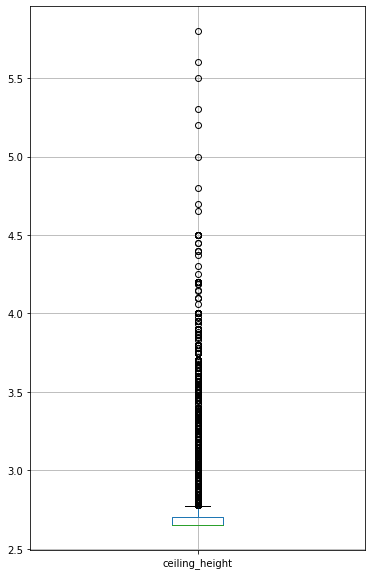

In [ ]:
data.boxplot(column='ceiling_height', figsize=(6, 10))

<AxesSubplot:>

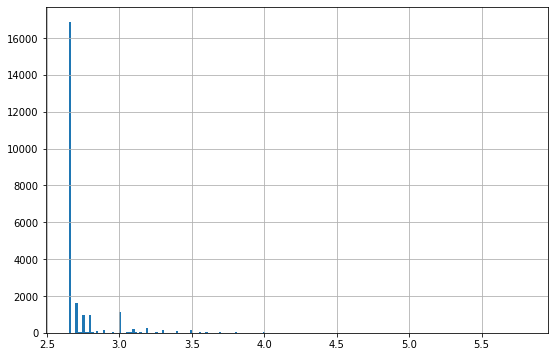

In [ ]:
data['ceiling_height'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['ceiling_height'].quantile(0.25)
Q3 = data['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(2.499999999999999, 2.850000000000001)

In [ ]:
data['ceiling_height'].shape[0]

23660

In [ ]:
data[data['ceiling_height'] < 2.85].shape[0]

20698

In [ ]:
final_df = data.query('ceiling_height < 2.85')

<AxesSubplot:>

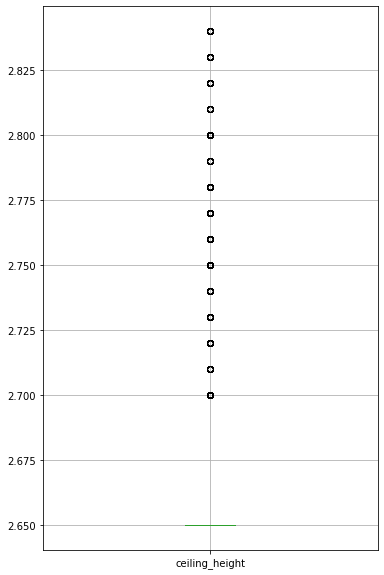

In [ ]:
final_df.boxplot(column='ceiling_height', figsize=(6, 10))

In [ ]:
final_df['ceiling_height'].describe()

count    20698.000000
mean         2.667390
std          0.040739
min          2.650000
25%          2.650000
50%          2.650000
75%          2.650000
max          2.840000
Name: ceiling_height, dtype: float64

- Средняя высота потолков составила 2.66

**Этаж квартиры** <a id='floor1'></a>

In [ ]:
data['floor'].describe()

count    23660.000000
mean         5.892223
std          4.885264
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

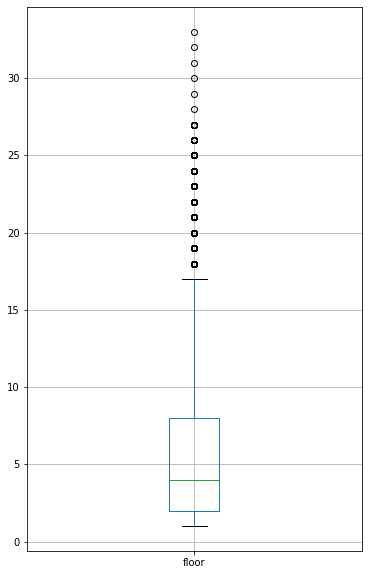

In [ ]:
data.boxplot(column='floor', figsize=(6, 10))

<AxesSubplot:>

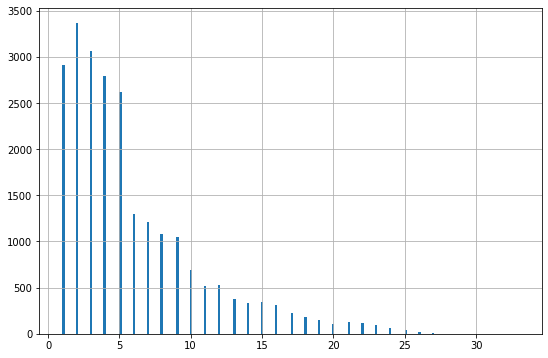

In [ ]:
data['floor'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['floor'].quantile(0.25)
Q3 = data['floor'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-16.0, 26.0)

In [ ]:
data['floor'].shape[0]

23660

In [ ]:
data[data['floor'] < 26].shape[0]

23620

In [ ]:
final_df = data.query('floor < 26')

<AxesSubplot:>

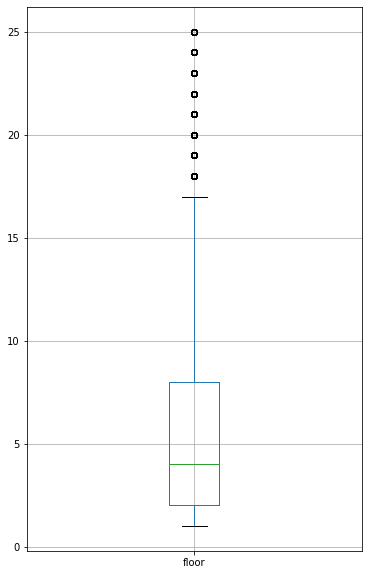

In [ ]:
final_df.boxplot(column='floor', figsize=(6, 10))

In [ ]:
final_df['floor'].describe()

count    23620.000000
mean         5.856605
std          4.811539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64

In [ ]:
final_df['floor'].value_counts()

2     3365
3     3067
1     2916
4     2796
5     2615
6     1303
7     1211
8     1081
9     1050
10     686
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      44
Name: floor, dtype: int64

- Средний показатель 5 этаж. Большинство квартир находится на втором этаже.

**Тип этажа** <a id='floor_type1'></a>

In [ ]:
data['floor_type'].describe()

count      23660
unique         3
top       другой
freq       17423
Name: floor_type, dtype: object

<AxesSubplot:>

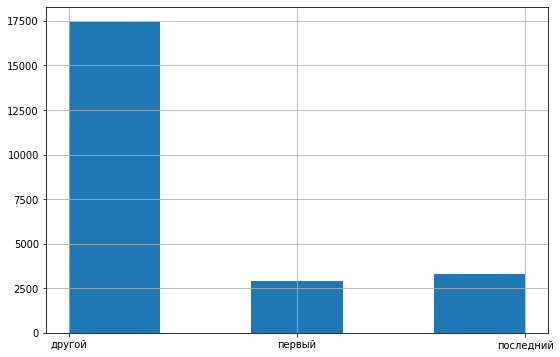

In [ ]:
data['floor_type'].hist(figsize=(9,6), bins=5)

In [ ]:
data['floor_type'].value_counts()

другой       17423
последний     3321
первый        2916
Name: floor_type, dtype: int64

- В большинстве случаев, этаж не является первым и последним.

**Общее количество этажей в доме**  <a id='floors_total1'></a>

In [ ]:
data['floors_total'].describe()

count    23574.00000
mean        10.67935
std          6.59877
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

<AxesSubplot:>

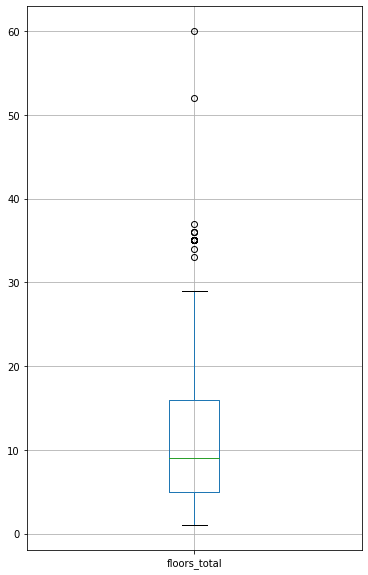

In [ ]:
data.boxplot(column='floors_total', figsize=(6, 10))

<AxesSubplot:>

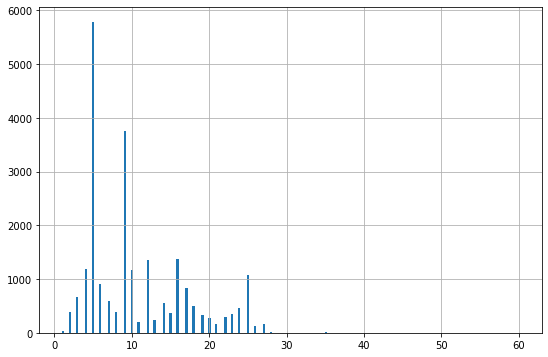

In [ ]:
data['floors_total'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['floors_total'].quantile(0.25)
Q3 = data['floors_total'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR 

(-28.0, 49.0)

In [ ]:
data['floors_total'].shape[0]

23660

In [ ]:
data[data['floors_total'] < 49].shape[0]

23572

In [ ]:
final_df = data.query('floors_total < 49')

<AxesSubplot:>

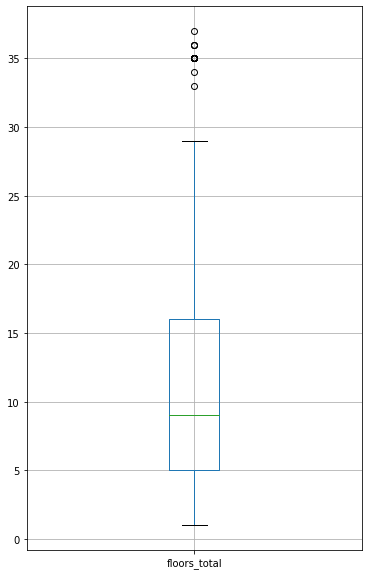

In [ ]:
final_df.boxplot(column='floors_total', figsize=(6, 10))

In [ ]:
final_df['floors_total'].describe()

count    23572.000000
mean        10.675505
std          6.585728
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

- В среднем, этажность дома 10 этажей, в данном случае, лучше даже взять медианное значение, т.к. 9 этажные дома явно более распространённые.

**Расстояние до центра города** <a id='city_centers_nearest_mtr1'></a>

- Так как ранее значения были переведены в километры и колонку с расстоянием выраженным в километрах не создавали, создадим колонку со значениями в метрах.

In [ ]:
data['city_centers_nearest_mtr'] = data['city_centers_nearest'] * 1000

In [ ]:
data['city_centers_nearest_mtr'].describe()

count    18142.000000
mean     14211.747933
std       8605.174832
min        181.000000
25%       9267.000000
50%      13114.000000
75%      16297.500000
max      65968.000000
Name: city_centers_nearest_mtr, dtype: float64

<AxesSubplot:>

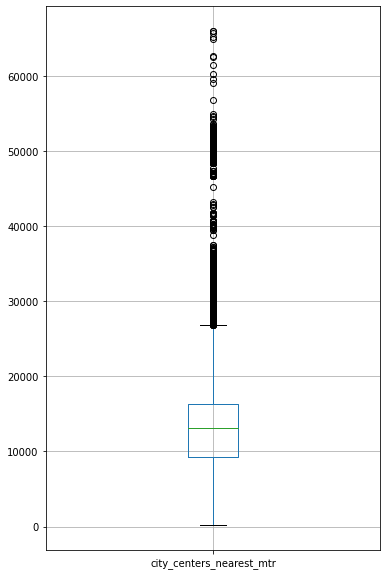

In [ ]:
data.boxplot(column='city_centers_nearest_mtr', figsize=(6, 10))

<AxesSubplot:>

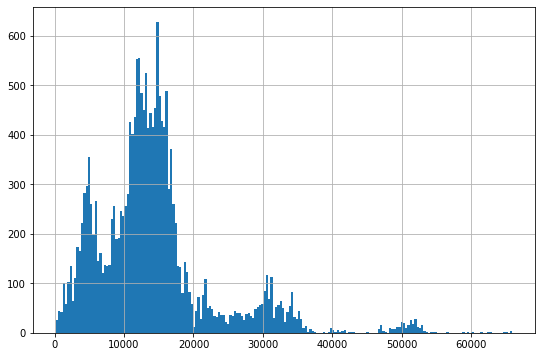

In [ ]:
data['city_centers_nearest_mtr'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['city_centers_nearest_mtr'].quantile(0.25)
Q3 = data['city_centers_nearest_mtr'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR

(-11824.499999999993, 37388.99999999999)

In [ ]:
data['city_centers_nearest_mtr'].shape[0]

23660

In [ ]:
data[data['city_centers_nearest_mtr'] < 37388].shape[0]

17828

In [ ]:
final_df = data.query('city_centers_nearest_mtr < 37388')

<AxesSubplot:>

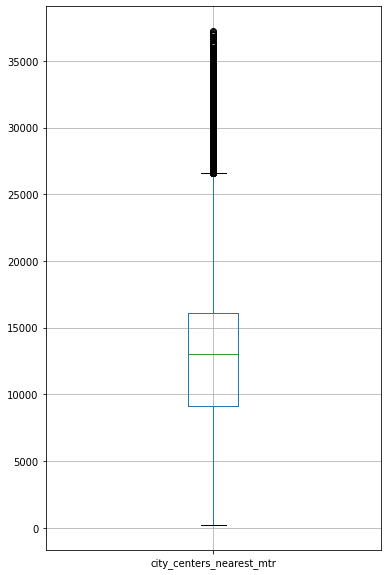

In [ ]:
final_df.boxplot(column='city_centers_nearest_mtr', figsize=(6, 10))

In [ ]:
final_df['city_centers_nearest_mtr'].describe()

count    17828.000000
mean     13586.945647
std       7240.268777
min        181.000000
25%       9154.500000
50%      13005.000000
75%      16118.750000
max      37241.000000
Name: city_centers_nearest_mtr, dtype: float64

- В среднем, расстояние до центра составляет 13586 метра.

**Расстояние до ближайшего аэропорта** <a id='airports_nearest1'></a>

In [ ]:
data['airports_nearest'].describe()

count    18118.000000
mean        28.799755
std         12.640657
min          6.450000
25%         18.574000
50%         26.743500
75%         37.294000
max         84.869000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

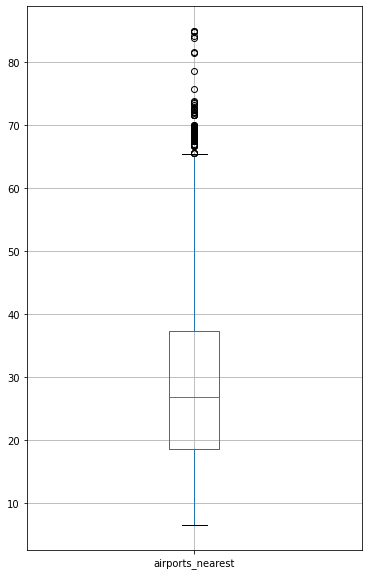

In [ ]:
data.boxplot(column='airports_nearest', figsize=(6, 10))

<AxesSubplot:>

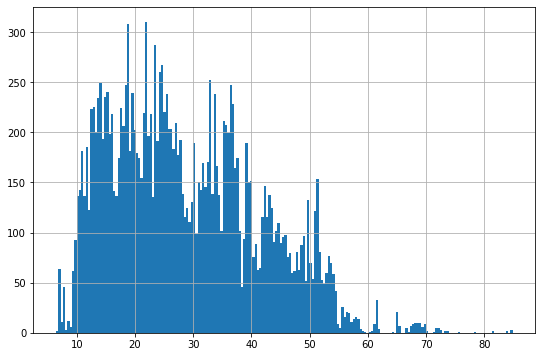

In [ ]:
data['airports_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['airports_nearest'].quantile(0.25)
Q3 = data['airports_nearest'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR

(-37.585999999999984, 93.45399999999998)

In [ ]:
data['airports_nearest'].shape[0]

23660

In [ ]:
data[data['airports_nearest'] < 93.45].shape[0]

18118

In [ ]:
final_df = data.query('airports_nearest < 93.45')

<AxesSubplot:>

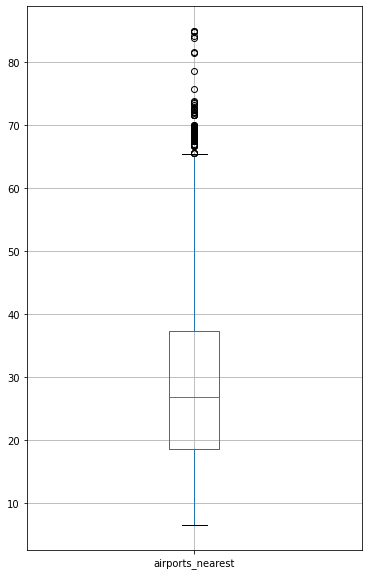

In [ ]:
final_df.boxplot(column='airports_nearest', figsize=(6, 10))

In [ ]:
final_df['airports_nearest'].describe()

count    18118.000000
mean        28.799755
std         12.640657
min          6.450000
25%         18.574000
50%         26.743500
75%         37.294000
max         84.869000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

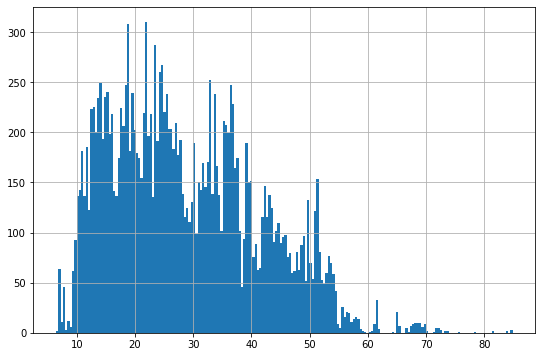

In [ ]:
final_df['airports_nearest'].hist(figsize=(9,6), bins=200)

- Среднее расстояние до аэропорта составляет 28.7 км.

**Расстояние до ближайшего парка** <a id='parks_nearest1'></a>

In [ ]:
data['parks_nearest'].describe()

count    8051.000000
mean        0.491055
std         0.342677
min         0.003000
25%         0.288000
50%         0.455000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

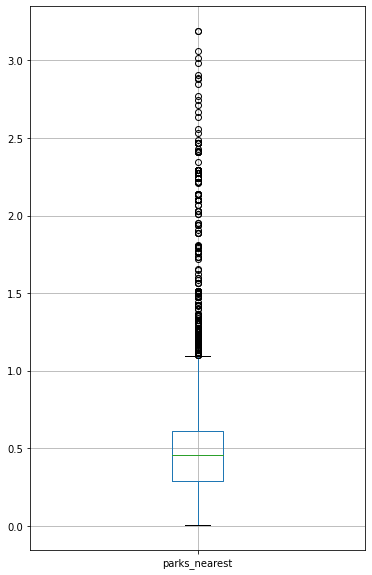

In [ ]:
data.boxplot(column='parks_nearest', figsize=(6, 10))

<AxesSubplot:>

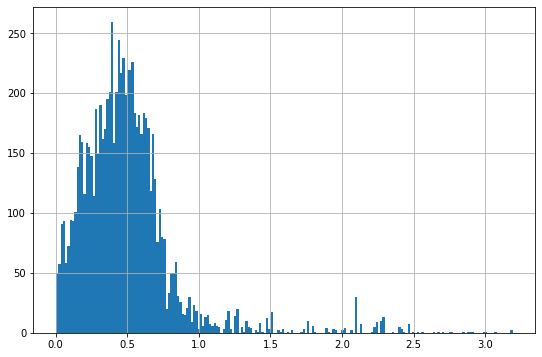

In [ ]:
data['parks_nearest'].hist(figsize=(9,6), bins=200)

In [ ]:
Q1 = data['parks_nearest'].quantile(0.25)
Q3 = data['parks_nearest'].quantile(0.75)
IQR = Q3 - Q1
Q1 - 3 * IQR, Q3 + 3 * IQR

(-0.6839999999999999, 1.584)

In [ ]:
data['parks_nearest'].shape[0]

23660

In [ ]:
data[data['parks_nearest'] < 1.584].shape[0]

7897

- На данном этапе теряем большое кол-во данных, по этому, в данном случае, скорее даже не стоит применять какую-то фильтрацию по условию.

<AxesSubplot:>

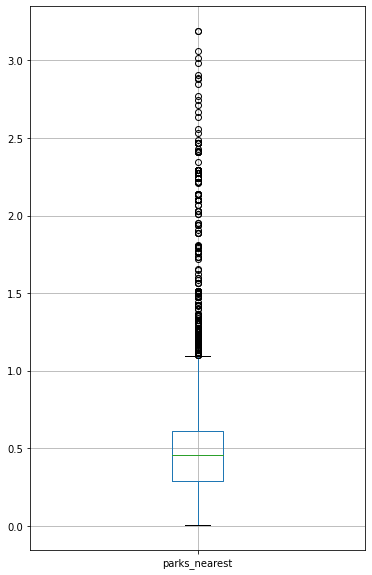

In [ ]:
data.boxplot(column='parks_nearest', figsize=(6, 10))

In [ ]:
data['parks_nearest'].describe()

count    8051.000000
mean        0.491055
std         0.342677
min         0.003000
25%         0.288000
50%         0.455000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

- Среднее расстояние до парка 0.49 км.

**Дата и месяц публикации объявления** <a id='publication_day1'></a>

In [ ]:
data['publication_day'].value_counts()

3    4288
1    4177
4    3994
2    3966
0    3607
5    1931
6    1697
Name: publication_day, dtype: int64

<AxesSubplot:>

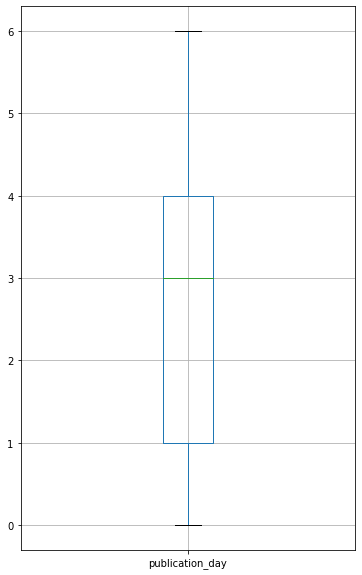

In [ ]:
data.boxplot(column='publication_day', figsize=(6, 10))

<AxesSubplot:>

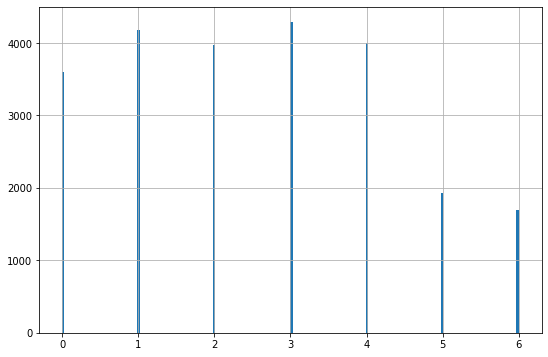

In [ ]:
data['publication_day'].hist(figsize=(9,6), bins=200)

- Больше всего объявление о продаже опубликованы в среду.

In [ ]:
data['publication_month'].value_counts()

2     2638
3     2582
4     2371
11    2370
10    2123
9     1979
6     1758
8     1741
7     1690
12    1639
1     1497
5     1272
Name: publication_month, dtype: int64

<AxesSubplot:>

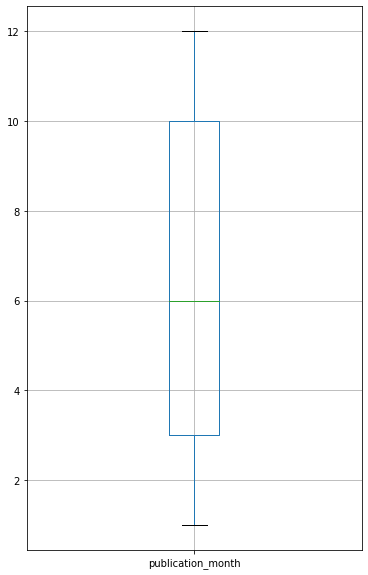

In [ ]:
data.boxplot(column='publication_month', figsize=(6, 10))

<AxesSubplot:>

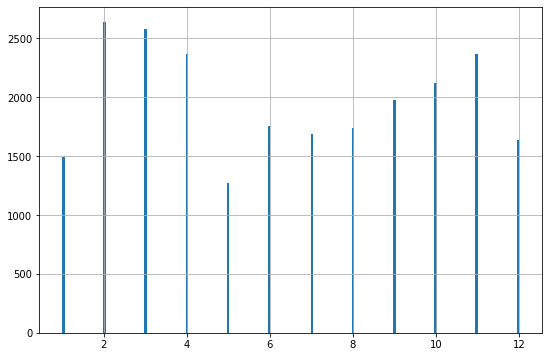

In [ ]:
data['publication_month'].hist(figsize=(9,6), bins=200)

- Больше всего объявление о продаже опубликованы в феврале.

**Скорость продажи квартир** <a id='days_expositions1'></a>

In [ ]:
data['days_exposition'].describe()

count    20484.000000
mean       180.654364
std        219.563812
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

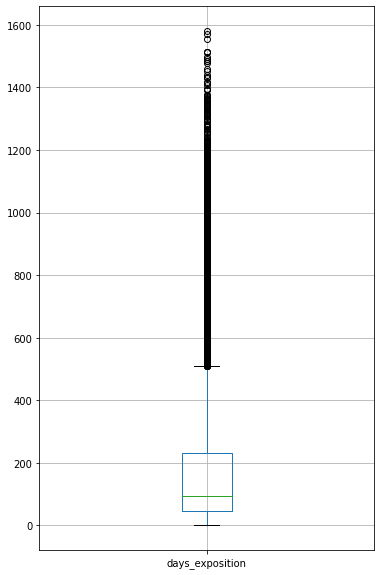

In [ ]:
data.boxplot(column='days_exposition', figsize=(6, 10))

Text(0, 0.5, 'Количество объявлений')

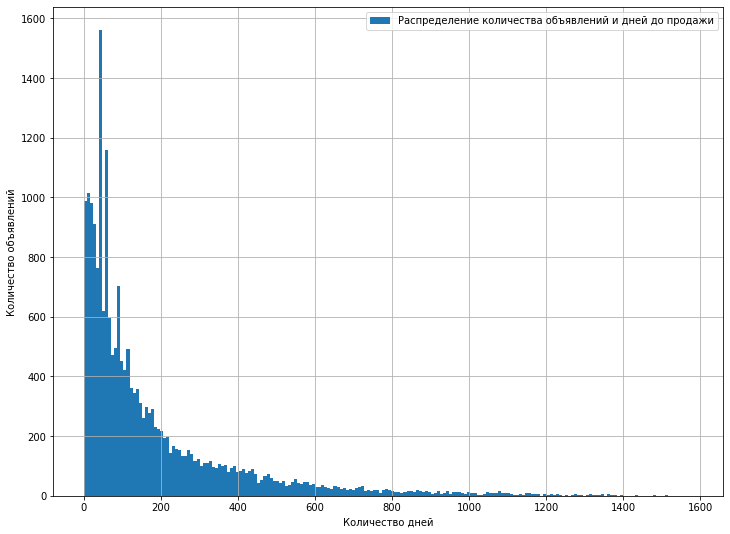

In [ ]:
data.plot(kind='hist', y='days_exposition', bins=200, \
          label='Распределение количества объявлений и дней до продажи', grid=True, figsize=(12, 9))
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')

In [ ]:
long_sale = data.query('days_exposition == 1580')
long_sale

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_meter,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_mtr,price_meter
18815,11,3500000,48.2,2014-12-15,2,2.65,5,36.15,2,False,False,False,7.7,3,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,1580.0,72614,0,12,2014,другой,<NA>,72614.107884


In [ ]:
data.query('locality_name == "новое девяткино"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_meter,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_mtr,price_meter
80,8,4050000,79.1,2018-02-23,3,3.00,15,59.325,1,False,False,False,11.95,1,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,235.0,51201,4,2,2018,первый,<NA>,51201.011378
265,7,3150000,37.3,2016-08-16,1,2.80,17,27.975,14,False,False,False,10.30,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,359.0,84450,1,8,2016,другой,<NA>,84450.402145
350,10,4150000,52.5,2019-03-25,2,2.65,16,39.375,13,False,False,False,10.00,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,5.0,79047,0,3,2019,другой,<NA>,79047.619048
534,8,4600000,56.2,2018-08-30,2,2.65,20,42.150,16,False,False,False,9.90,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,46.0,81850,3,8,2018,другой,<NA>,81850.533808
822,20,4690000,73.4,2018-07-12,4,2.65,9,55.050,9,False,False,False,6.20,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,172.0,63896,3,7,2018,последний,<NA>,63896.457766


In [ ]:
data[data['locality_name'] == 'новое девяткино'].sort_values(by='days_exposition', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_meter,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_mtr,price_meter
18815,11,3500000,48.2,2014-12-15,2,2.65,5,36.150,2,False,False,False,7.70,3,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,1580.0,72614,0,12,2014,другой,<NA>,72614.107884
1090,15,3480000,45.1,2016-04-11,2,2.65,9,33.825,8,False,False,False,6.20,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,1011.0,77161,0,4,2016,другой,<NA>,77161.862528
22557,2,3960396,54.4,2015-02-13,2,2.80,18,40.800,1,False,False,False,10.94,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,880.0,72801,4,2,2015,первый,<NA>,72801.397059
15423,10,3100000,38.0,2016-05-30,1,2.75,16,28.500,15,False,False,False,9.20,2,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,870.0,81578,0,5,2016,другой,<NA>,81578.947368
13899,6,2750000,42.3,2016-03-26,2,2.65,3,31.725,3,False,False,False,6.00,1,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,788.0,65011,5,3,2016,последний,<NA>,65011.820331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,12,4400000,60.4,2018-09-14,3,2.65,10,45.300,10,False,False,False,6.00,1,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,72847,4,9,2018,последний,<NA>,72847.682119
15212,3,3250000,46.1,2019-04-24,1,2.65,10,34.575,10,False,False,False,13.30,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,70498,2,4,2019,последний,<NA>,70498.915401
16326,16,3100000,33.9,2019-03-18,1,2.65,16,25.425,15,False,False,False,9.00,0,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,91445,0,3,2019,другой,<NA>,91445.427729
17073,20,4200000,57.8,2019-04-17,1,2.65,10,43.350,10,False,False,False,10.00,2,новое девяткино,<NA>,<NA>,0,<NA>,0.0,<NA>,NaN,72664,2,4,2019,последний,<NA>,72664.359862


- Поскольку один из вопросов "какие продажи можно считать необычно долгими", из общего числа данных о количистве дней пока объявление было размещенно, выбросы не отсекались, рассмотрели ситуацию в целом.
- Среднее время, пока объявление было размещено, составляет 180 дней.
- Медианное значение 90 дней, что выглядит более реально. 
- Максимальное 1580 дней, в данном случае, возникла либо какая-то ошибка с "закрытием" объявления, либо такой срок обусловлен особенностью квартиры, на пример, большая задолженность за коммунальные услуги, арест на имуществе и  т.д., посему покупателя было найти не легко. Кроме того, по данному населённому пункту, это не единственное объявление с длительным сроком продажи.
- Думаю, вполне нормальным сроком продажи, можно считать медианное значение, равное 90 дней, всё, что свыше, уже можно считать длительным сроком продажи, а всё, что выше среднего значения в 180 дней - необычно долгими.

**Влияние характеристик квартиры на её стоимость** <a id='speed_sale'></a>

- Влияние общей площади квартиры на стоимость.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

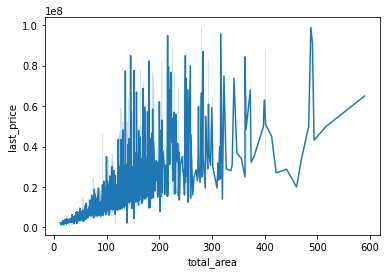

In [ ]:
sns.lineplot(data=final_df, x='total_area', y='last_price')

<AxesSubplot:title={'center':'Влияние общей площади квартиры на стоимость'}, xlabel='total_area'>

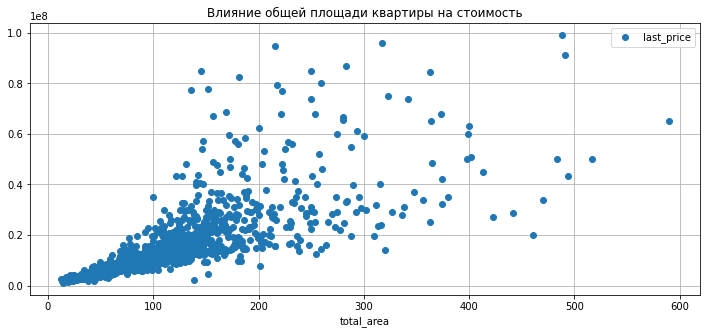

In [ ]:
final_df.pivot_table(index='total_area', values='last_price') \
.plot(style='o', grid=True, title='Влияние общей площади квартиры на стоимость', figsize=(12, 5))

- На графиках мы можем заметить зависимость стоимости квартир от их площади.

In [ ]:
final_df.groupby('total_area')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
total_area,
488.0,99000000.0
317.0,96000000.0
216.0,95000000.0
491.0,91075000.0
283.0,87000000.0
249.7,85000000.0
145.7,85000000.0
363.1,84382000.0
181.1,82400000.0


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

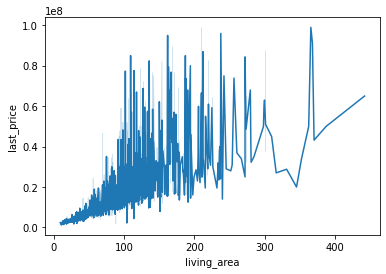

In [ ]:
sns.lineplot(data=final_df, x='living_area', y='last_price')

<AxesSubplot:title={'center':'Влияние жилой площади квартиры на стоимость'}, xlabel='living_area'>

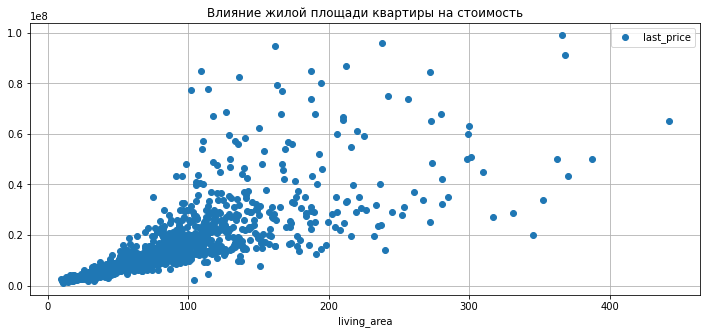

In [ ]:
final_df.pivot_table(index='living_area', values='last_price') \
.plot(style='o', grid=True, title='Влияние жилой площади квартиры на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('living_area')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
living_area,
210.000,99000000.0
366.000,99000000.0
237.750,96000000.0
162.000,95000000.0
371.250,91500000.0
368.250,91075000.0
212.250,87000000.0
109.275,85000000.0
380.250,84000000.0


- Графики почти идентичны тем, что мы рассматривали при общей площади. Зависимость стоимости от площади - есть.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

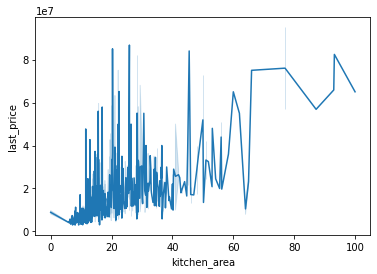

In [ ]:
sns.lineplot(data=final_df, x='kitchen_area', y='last_price')

<AxesSubplot:title={'center':'Влияние площади кухни на стоимость'}, xlabel='kitchen_area'>

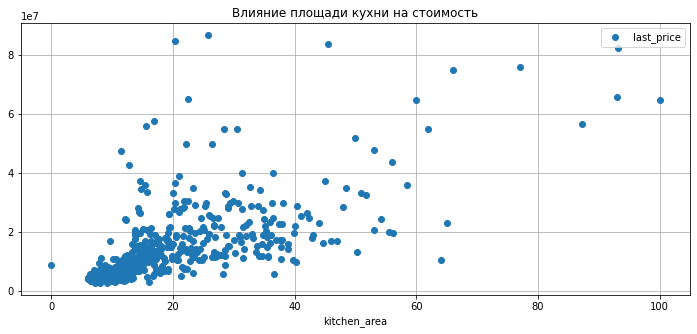

In [ ]:
final_df.pivot_table(index='kitchen_area', values='last_price') \
.plot(style='o', grid=True, title='Влияние площади кухни на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('kitchen_area')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
kitchen_area,
25.86,86738800.0
20.31,85000000.0
45.50,84000000.0
93.20,82400000.0
77.00,76000000.0
66.00,75000000.0
93.00,65850000.0
22.46,65138176.0
60.00,65000000.0


- А вот при рассмотрении площади кухни, такой явной взаимосвязи не наблюдается, хоть она и есть, чем выше площадь кухни, тем с большей степенью вероятности, больше и общая и жилая площади.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

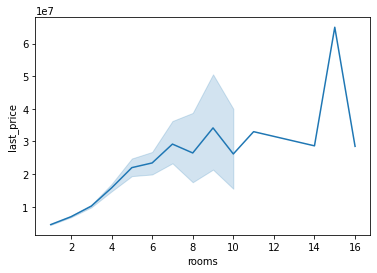

In [ ]:
sns.lineplot(data=final_df, x='rooms', y='last_price')

<AxesSubplot:title={'center':'Влияние количества комнат на стоимость'}, xlabel='rooms'>

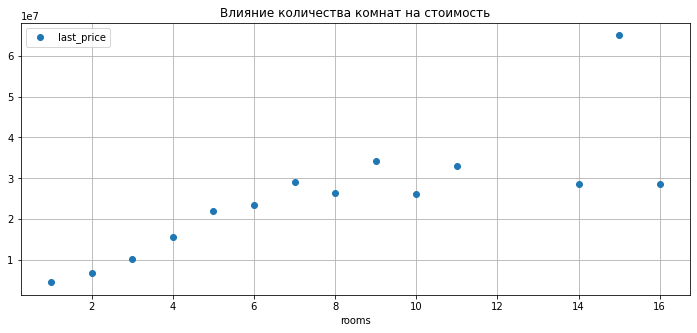

In [ ]:
final_df.pivot_table(index='rooms', values='last_price') \
.plot(style='o', grid=True, title='Влияние количества комнат на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('rooms')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
rooms,
15,65000000.0
9,34152362.5
11,33000000.0
7,29191891.891892
14,28659000.0
16,28500000.0
8,26473750.0
10,26166666.666667
6,23415841.907692


- В данном случае, результат вполне ожидаемый, с количеством комнат, возрастает и площадь квартиры, а между ними, как мы уже выяснили, есть зависимость.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

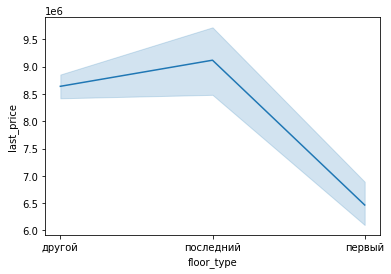

In [ ]:
sns.lineplot(data=final_df, x='floor_type', y='last_price')

<AxesSubplot:title={'center':'Влияние типа этажа на стоимость'}, xlabel='floor_type'>

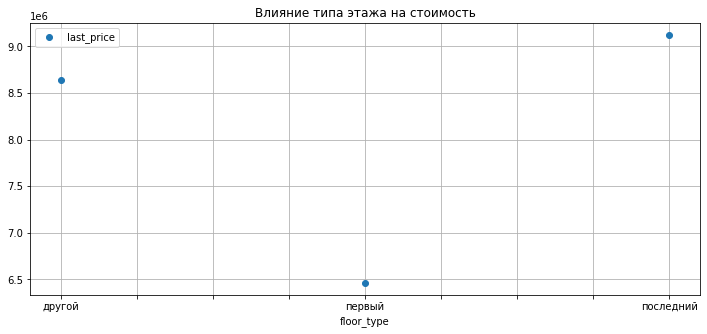

In [ ]:
final_df.pivot_table(index='floor_type', values='last_price') \
.plot(style='o', grid=True, title='Влияние типа этажа на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('floor_type')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
floor_type,
последний,9117724.078831
другой,8639623.040893
первый,6466405.550265


- Здесь также получаем вполне ожидаемый результат, квартиры на первом этаже дешевле, нежели чем квартиры этажами выше. Самая высокая стоимость квартир на последнем этаже дома.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Согласна, это логично</div>


<AxesSubplot:xlabel='publication_day', ylabel='last_price'>

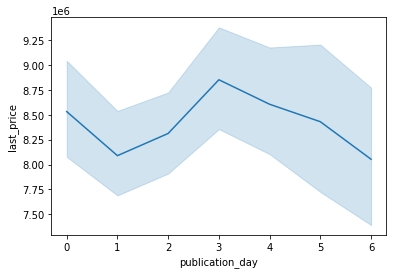

In [ ]:
sns.lineplot(data=final_df, x='publication_day', y='last_price')

<AxesSubplot:title={'center':'Влияние дня публикации на стоимость'}, xlabel='publication_day'>

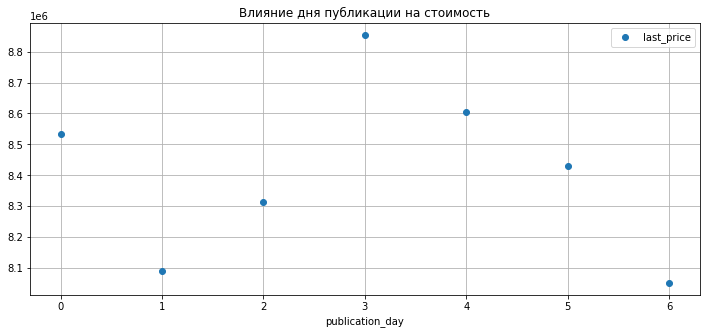

In [ ]:
final_df.pivot_table(index='publication_day', values='last_price') \
.plot(style='o', grid=True, title='Влияние дня публикации на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('publication_day')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
publication_day,
3,8852232.628261
4,8605981.520505
0,8532333.943541
5,8430559.311793
2,8312563.153257
1,8089421.143063
6,8053492.333948


- Прямой зависимости между днём публикации и стоимостью продажи не наблюдается.

<AxesSubplot:xlabel='publication_month', ylabel='last_price'>

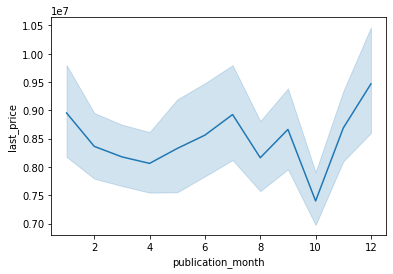

In [ ]:
sns.lineplot(data=final_df, x='publication_month', y='last_price')

<AxesSubplot:title={'center':'Влияние месяца публикации на стоимость'}, xlabel='publication_month'>

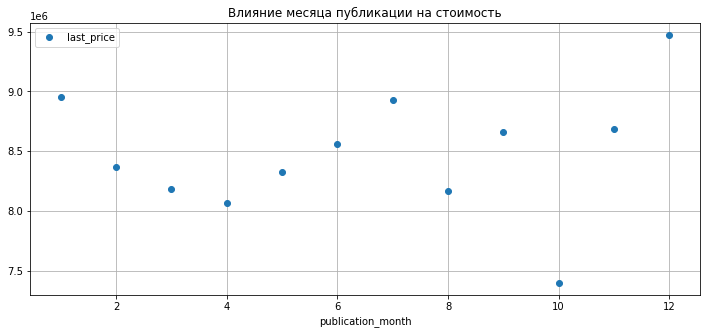

In [ ]:
final_df.pivot_table(index='publication_month', values='last_price') \
.plot(style='o', grid=True, title='Влияние месяца публикации на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('publication_month')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
publication_month,
12,9468674.6
1,8955100.829659
7,8926861.188581
11,8688981.33727
9,8663919.134884
6,8563111.494792
2,8364949.03376
5,8328226.13615
3,8179270.793532


- Здесь всё аналогично дням публикации, значения распределяются вполне равномерно.

<AxesSubplot:xlabel='publication_year', ylabel='last_price'>

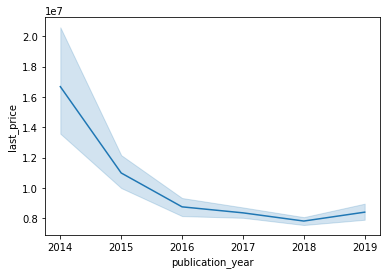

In [ ]:
sns.lineplot(data=final_df, x='publication_year', y='last_price')

<AxesSubplot:title={'center':'Влияние года публикации на стоимость'}, xlabel='publication_year'>

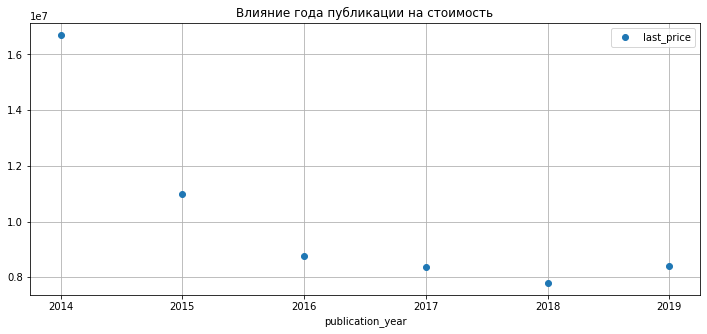

In [ ]:
final_df.pivot_table(index='publication_year', values='last_price') \
.plot(style='o', grid=True, title='Влияние года публикации на стоимость', figsize=(12, 5))

In [ ]:
final_df.groupby('publication_year')['last_price'] \
.agg(['mean']).sort_values(by='mean', ascending=False).head(10)

,mean
publication_year,
2014,16682743.233333
2015,10981925.658537
2016,8745887.125133
2019,8394491.934113
2017,8349940.359069
2018,7808266.979782


- А вот здесь уже есть некоторая закономерность, с течением времени, с каждым годом, стоимость продажи падала и только в 2019 году, мы видим небольшой подъём.

- При проверки зависимости стоимости квартиры от общей, жилой и кухонной площадей, а также количества комнат, типа этажа и дат публикации объявления, можно сделать вывод, что больше всего на стоимость квартиры влияет её площадь (в данном случае, я бы сказал общая, т.к. общая, жилая и кухонная площади, в большинстве случаев будут зависеть друг от друга), количество комнат, что так или иначе тоже связано с площадью квартиры. Также влияние на стоимость оказывает этаж на котором размещена квартира, квартиры, что находятся выше первого этажа, имеют более высокую стоимость. При просмотре зависимости от даты публикации, мы также заметили изменение стоимости продажи с течением времени.

**Средняя стоимость квадратного метра для десяти населённх пунктов с максимальным числом объявлений** <a id='middleprice'></a>

In [ ]:
data['price_meter'] = data['last_price'] / data['total_area']

In [ ]:
data.groupby('locality_name')['price_meter'].agg({'count', 'mean'}) \
.sort_values(by=['count'], ascending=False).head(10)


,mean,count
locality_name,,
санкт-петербург,113599.219414,15682
мурино,86087.51205,590
кудрово,95324.930544,472
шушары,78677.364217,440
всеволожск,68654.473986,398
пушкин,103125.819291,369
колпино,75424.579098,338
парголово,90175.913458,327
гатчина,68746.146763,307


- Самая высокая стоимость за один квардратный метр в лидерах по количеству объявлений, в Санкт-Петербурге.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️И это логично)</div>


**Средняя стоимость каждого километра в Санкт-Петербурге** <a id='spbprice'></a>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

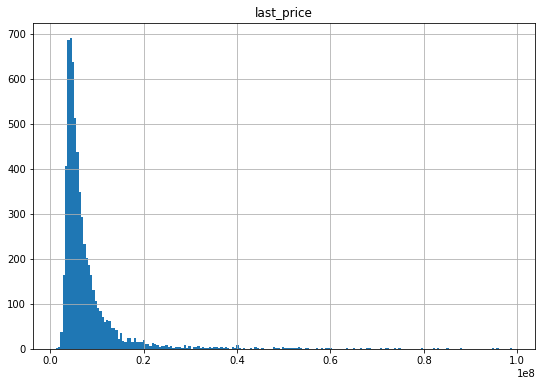

In [ ]:
data.query('locality_name == "санкт-петербург"') \
.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean') \
.hist(bins=200, figsize=(9, 6))

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>

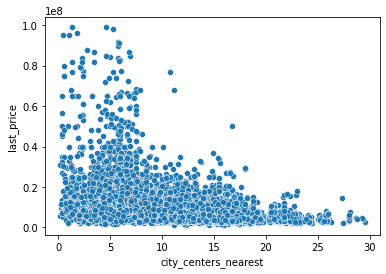

In [ ]:
sns.scatterplot(data=data.query('locality_name == "санкт-петербург"'), x='city_centers_nearest', y='last_price')

In [ ]:
data.query('locality_name == "санкт-петербург"') \
.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean') \
.sort_values(by='city_centers_nearest', ascending=True) \
.head(10)

,last_price
city_centers_nearest,
0.181,31099000.0
0.208,5800000.0
0.215,10990000.0
0.287,9590000.0
0.291,11500000.0
0.318,45455891.0
0.329,7200000.0
0.376,13500000.0
0.387,13500000.0


In [ ]:
middle_price_spb = data.query('locality_name == "санкт-петербург"')
middle_price_spb.groupby('locality_name')['city_centers_nearest_mtr'].agg(['mean'])

,mean
locality_name,
санкт-петербург,11618.763667


- По графикам можно заметить, что чем ближе квартира к центру, тем выше её стоимость. Также, выше мы рассчитали среднюю стоимость километра дла Санкт-Петербурга.

### Общий вывод

- При проведении исследования, была выполнена предобработка данных, а именно заполнены отсутствующие значения, данные были преобразованы в необходимый нам формат, исключены неявные дубликаты, также, некоторое количество строк пришлось удалить, чтобы не искажать конечный результат. Были устранены аномальные значения, которые возникли из-за технических ошибок, либо ошибок при ручном заполнее информации.
- В таблицу были добавлены новые столбцы для проведения исследовательского анализа, в которых были отброшены выбросы, в целях получения более точного результата исследования.
- Проверили на сколько быстро продаются квартиры и какие сроки можно считать нормальными.
- Посчитали среднюю стоимость одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
- В конечном счёте, можно сделать вывод, что на стоимость квартиры, влияют такие факторы как, общая площадь (здесь можно учесть и нежилую площадь квартиры, т.к. эти показатели взаимосвязаны); количество комнат, что также свяно с площадью, в большинстве случаев; этаж на котором размещается квартира; расстояние до центра.
- На графиках мы также заметили как менялась стоимость недвижимости ежегодно.
- Лидером по количеству объявлений о продаже стал город Санкт-Петербург, что вполне логично, т.к. он больше по площади и населённости в сравнении с другими населёнными пунктами.
- Большинство проданных квартир имеют от 1 до 3 комнат, большинство располагается от 1 до 10 этажа, квартиры с такими параметрами, будет продать легче всего. 




<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Спасибо за общий вывод! </div>


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод